# Crypto data Collection

In [1]:
from src.mtal.data_collect import get_spot_pairs
from src.mtal.data_collect import get_pair_df

cryptos = get_spot_pairs()
df = get_pair_df(pair="LTCUSDT")
df.head()

Open Time    Open    High     Low   Close        Volume  \
0 2017-12-11  272.00  330.00  239.99  311.40   59561.28759   
1 2017-12-18  311.23  366.96  177.58  262.90  251577.24855   
2 2017-12-25  262.90  284.34  193.20  223.69  223926.94979   
3 2018-01-01  223.69  315.00  212.74  269.01  442699.93154   
4 2018-01-08  269.01  271.82  195.03  234.12  435643.98700   

               Close Time  
0 2017-12-17 23:59:59.999  
1 2017-12-24 23:59:59.999  
2 2017-12-31 23:59:59.999  
3 2018-01-07 23:59:59.999  
4 2018-01-14 23:59:59.999

# Stocks data collection

In [2]:
from src.mtal.data_collect import get_ticker_names 
from src.mtal.data_collect import get_stock_data

tickers = get_ticker_names()

df = get_stock_data(tickers[0])
# df

# Compute and analysis

In [4]:

from src.mtal.analysis import compute_rsi

df_rsi = compute_rsi(df)
df_rsi = df.with_row_index()
df_rsi.tail()

shape: (5, 9)
┌───────┬────────────┬──────┬──────┬───┬───────┬────────────────┬────────┬────────────┐
│ index ┆ Date       ┆ Open ┆ High ┆ … ┆ Close ┆ Adjusted_close ┆ Volume ┆ Close Time │
│ ---   ┆ ---        ┆ ---  ┆ ---  ┆   ┆ ---   ┆ ---            ┆ ---    ┆ ---        │
│ u32   ┆ date       ┆ f64  ┆ f64  ┆   ┆ f64   ┆ f64            ┆ i64    ┆ date       │
╞═══════╪════════════╪══════╪══════╪═══╪═══════╪════════════════╪════════╪════════════╡
│ 223   ┆ 2024-05-06 ┆ 26.6 ┆ 27.0 ┆ … ┆ 27.0  ┆ 27.0           ┆ 344    ┆ 2024-05-06 │
│ 224   ┆ 2024-05-13 ┆ 27.2 ┆ 27.2 ┆ … ┆ 26.2  ┆ 26.2           ┆ 774    ┆ 2024-05-13 │
│ 225   ┆ 2024-05-20 ┆ 27.0 ┆ 27.2 ┆ … ┆ 26.2  ┆ 26.2           ┆ 246    ┆ 2024-05-20 │
│ 226   ┆ 2024-05-27 ┆ 26.2 ┆ 27.0 ┆ … ┆ 26.4  ┆ 26.4           ┆ 849    ┆ 2024-05-27 │
│ 227   ┆ 2024-06-03 ┆ 27.0 ┆ 28.0 ┆ … ┆ 26.8  ┆ 26.8           ┆ 285    ┆ 2024-06-03 │
└───────┴────────────┴──────┴──────┴───┴───────┴────────────────┴────────┴────────────┘

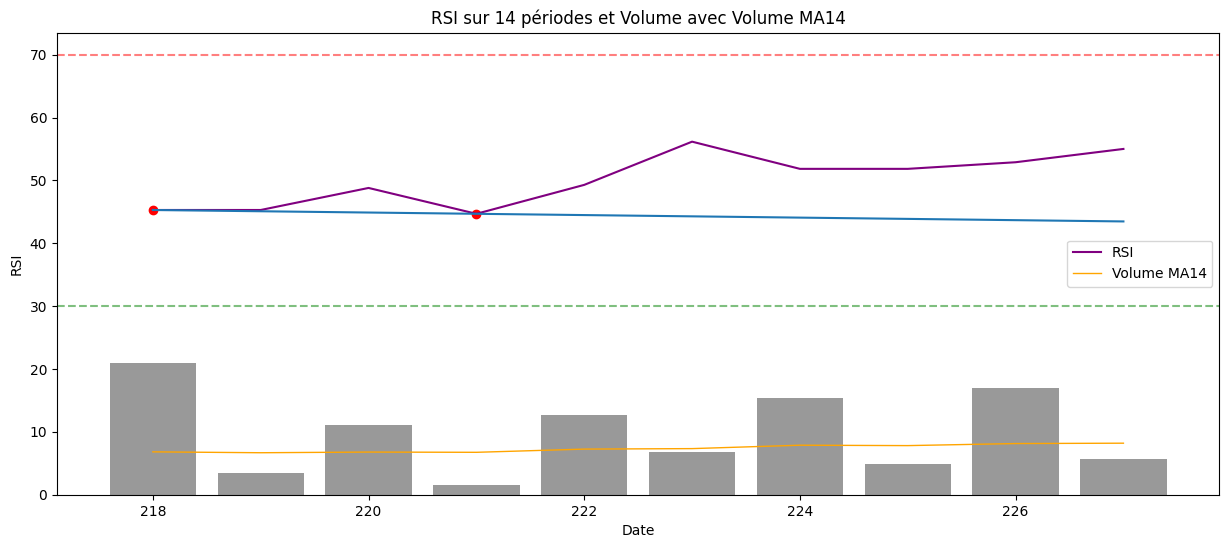

In [3]:
from src.mtal.dataviz import get_x_y_from_df, plot_rsi_with_line


from src.mtal.analysis import compute_rsi
from src.mtal.data_collect import get_ticker_names 
from src.mtal.data_collect import get_stock_data

tickers = get_ticker_names()

df = get_stock_data(tickers[0])
df_rsi = compute_rsi(df)
df_rsi = df_rsi.with_row_index()
df_rsi.tail()

plot_rsi_with_line(*get_x_y_from_df(df_rsi, 7, 10), df_rsi, limit=10)


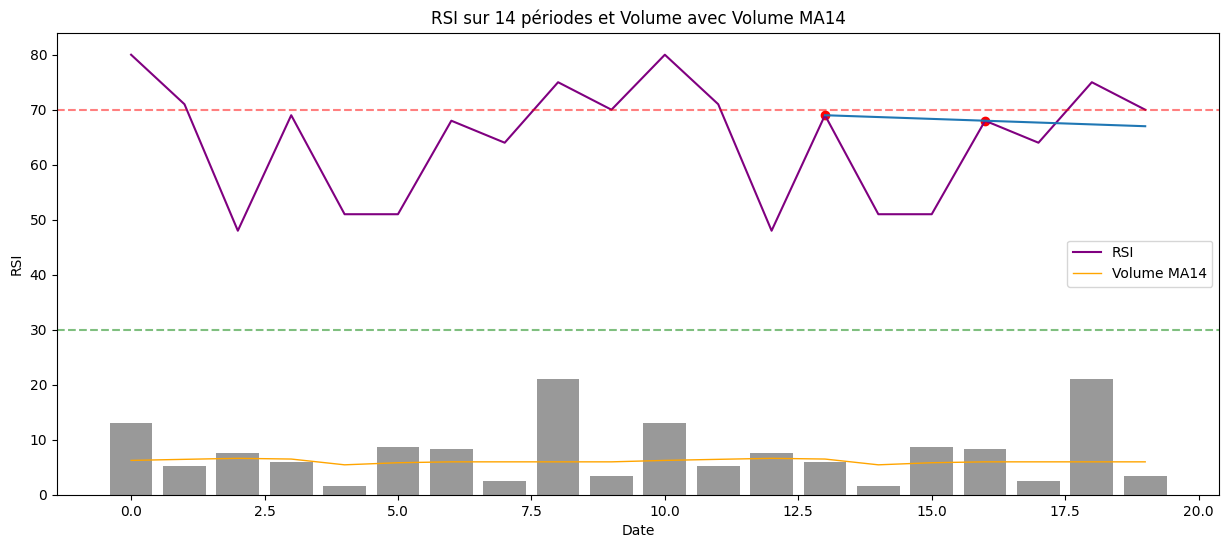

Line(x_1=13, x_2=16, y_1=69, y_2=68, score=2, a=-0.3333333333333333, b=73.33333333333333)

In [4]:
import polars as pl
from src.mtal.dataviz import get_x_y_from_df, plot_rsi_with_line
from src.mtal.analysis import is_valid_magic_line 

data = {
        "Date": [
            "2024-02-05",
            "2024-02-12",
            "2024-02-19",
            "2024-02-26",
            "2024-03-04",
            "2024-03-11",
            "2024-03-18",
            "2024-03-25",
            "2024-04-02",
            "2024-04-08",
        ],
        "Open": [25.4, 27.0, 26.8, 26.8, 25.8, 26.2, 26.0, 26.2, 25.2, 26.0],
        "High": [26.8, 27.0, 26.8, 26.8, 26.2, 26.6, 26.2, 26.2, 26.2, 26.2],
        "Low": [24.8, 25.4, 25.4, 25.4, 25.4, 25.4, 25.2, 25.2, 25.0, 25.0],
        "Close": [26.0, 26.4, 25.6, 25.8, 26.2, 26.2, 25.2, 26.0, 25.0, 25.0],
        "Volume": [657, 259, 383, 298, 83, 435, 420, 128, 1054, 175],
        "RSI": [80, 71, 48, 69, 51, 51, 68, 64, 75, 70],
        "ema5": [
            26.153542,
            26.235695,
            26.023796,
            25.949198,
            26.032798,
            26.088532,
            25.792355,
            25.861570,
            25,
            25.382920,
        ],
        "Volume_MA": [313.15, 322.90, 332.15, 325.55, 272.85, 292, 300, 300, 300, 300],
    }


# we need a longer dataset for rolling windows
for key, item in data.items():
    data[key] = item + item


df = pl.DataFrame(data=data)
df = df.with_row_index()


plot_rsi_with_line(*get_x_y_from_df(df, 4, 7), df, limit=100)

is_valid_magic_line(*get_x_y_from_df(df, 4, 7), df, limit=100)

In [7]:
import numpy as np 
def compute_line(x_1, x_2, y_1, y_2):
    a = (y_2 - y_1) / (x_2 - x_1)
    b = y_1 - a * x_1
    return a, b

a, b = compute_line(12, 15, 69, 68)
x = 12
y = a * 12 + b
print(y)


abs(a * x - y + b) / np.sqrt(a**2 + 1)

69.0


0.0

In [1]:
from src.mtal.analysis import compute_and_validate_2_combinations
from src.mtal.dataviz import display_top_k_lines

from src.mtal.analysis import compute_rsi
from src.mtal.data_collect import get_ticker_names 
from src.mtal.data_collect import get_stock_data

tickers = get_ticker_names()

df = get_stock_data(tickers[0])
df_rsi = compute_rsi(df)
df_rsi = df_rsi.with_row_index()



best_lines = compute_and_validate_2_combinations(df_rsi[-100:])


if best_lines:
    display_top_k_lines(best_lines, df_rsi, top_k=3)

# Visualisation
## Cryptos

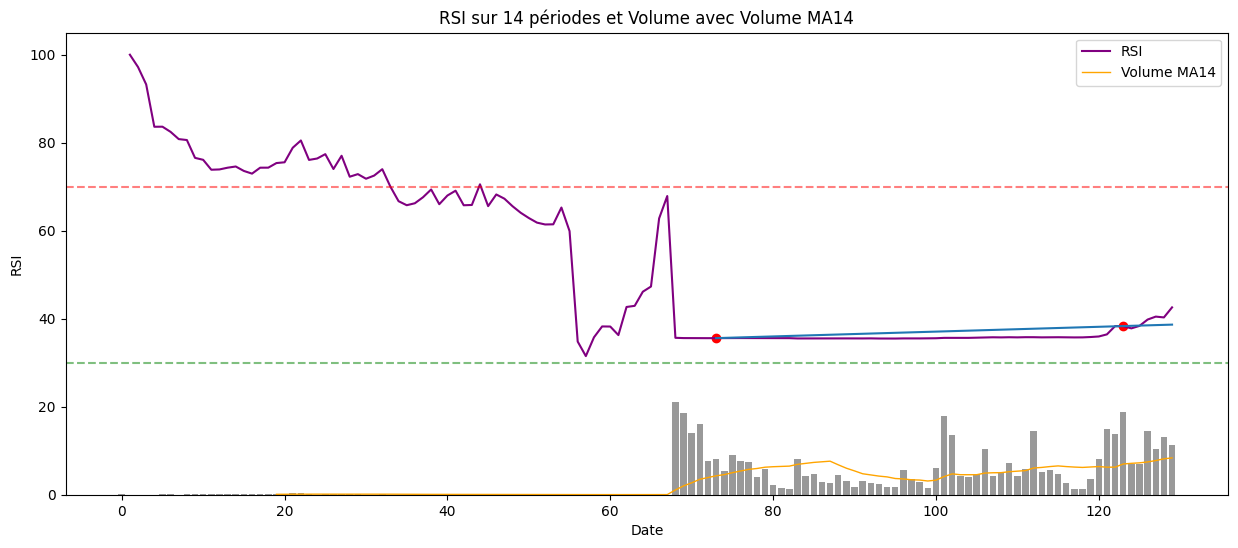

Asset: BNXUSDT, Score: 11, URL: https://www.tradingview.com/chart/?symbol=BINANCE:BNXUSDT&interval=1W


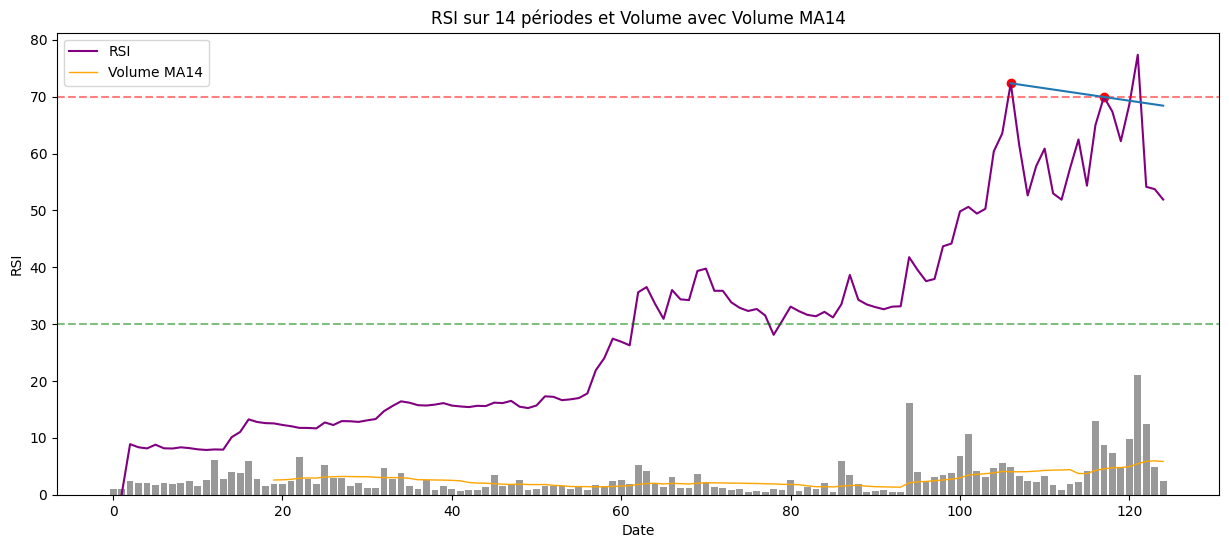

Asset: BICOUSDT, Score: 3, URL: https://www.tradingview.com/chart/?symbol=BINANCE:BICOUSDT&interval=1W


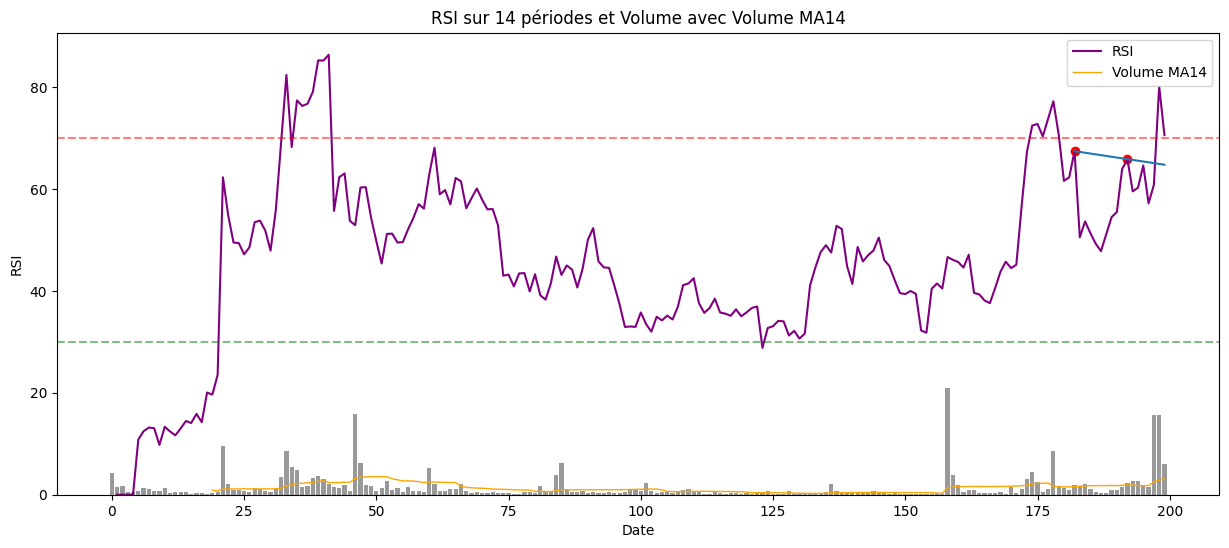

Asset: ONGUSDT, Score: 3, URL: https://www.tradingview.com/chart/?symbol=BINANCE:ONGUSDT&interval=1W


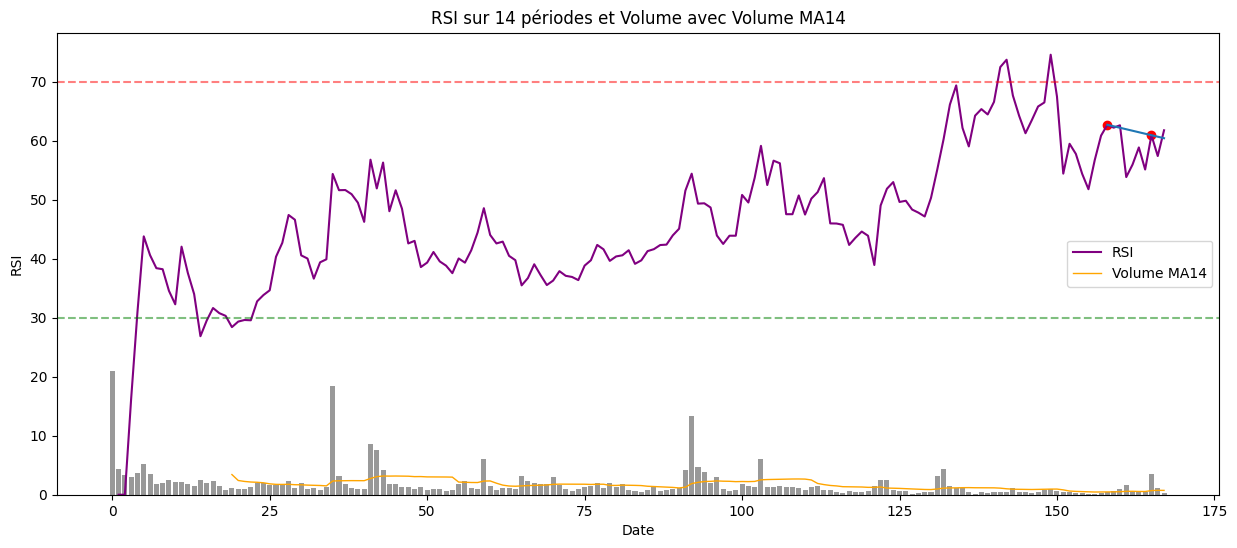

Asset: SFPUSDT, Score: 3, URL: https://www.tradingview.com/chart/?symbol=BINANCE:SFPUSDT&interval=1W


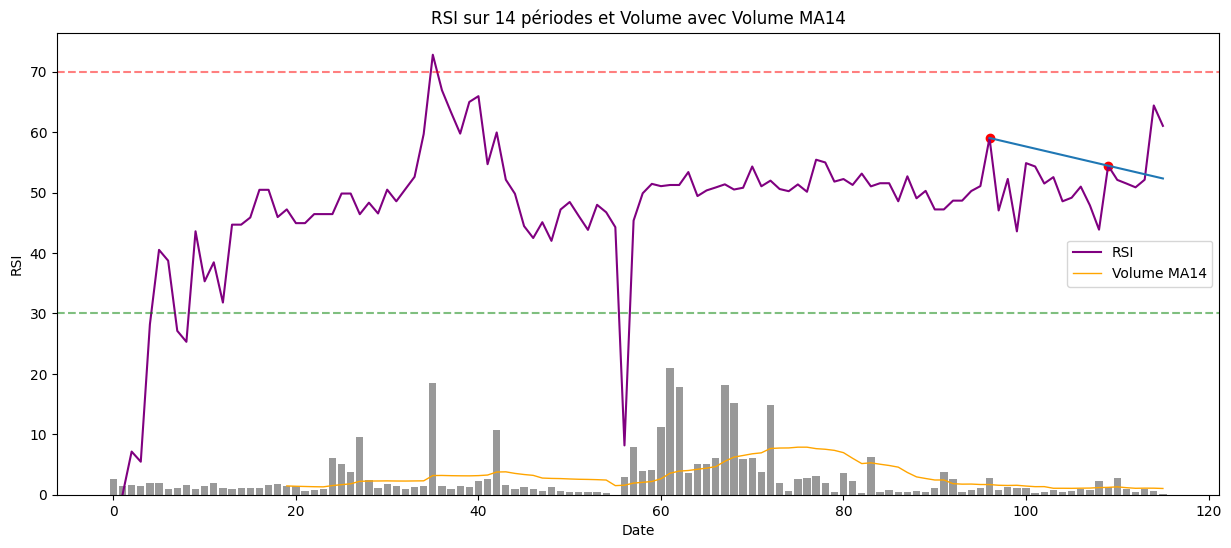

Asset: USDPUSDT, Score: 3, URL: https://www.tradingview.com/chart/?symbol=BINANCE:USDPUSDT&interval=1W


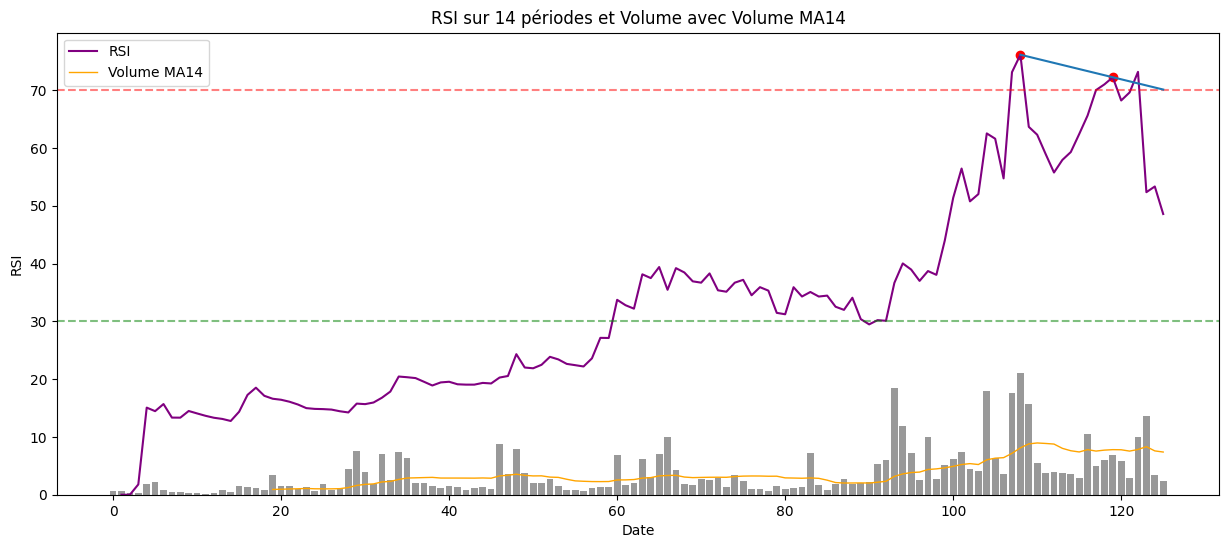

Asset: ALCXUSDT, Score: 2, URL: https://www.tradingview.com/chart/?symbol=BINANCE:ALCXUSDT&interval=1W


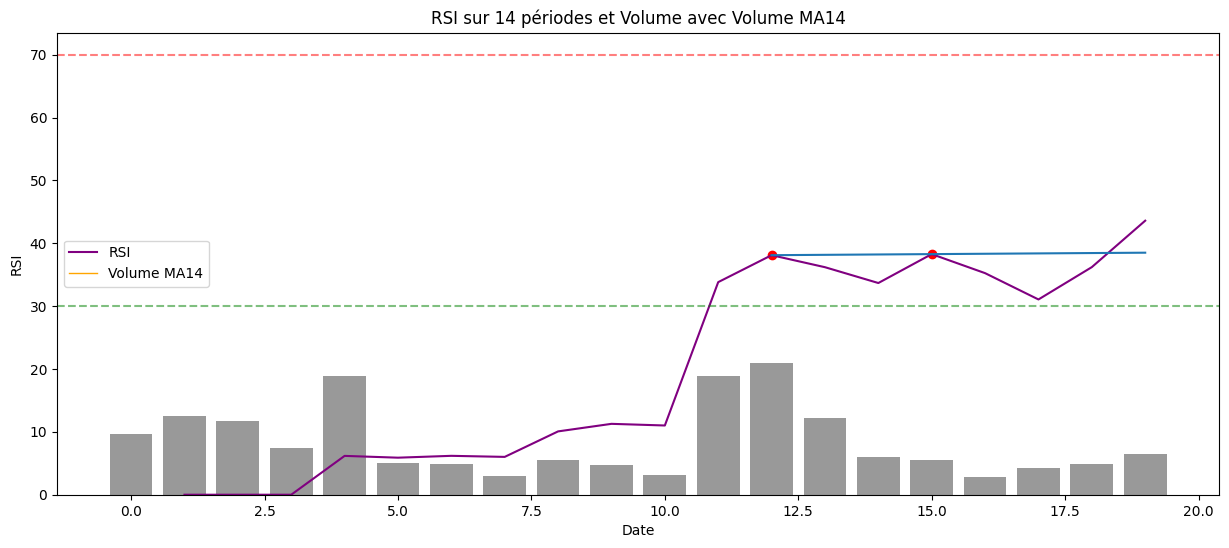

Asset: BONKUSDT, Score: 2, URL: https://www.tradingview.com/chart/?symbol=BINANCE:BONKUSDT&interval=1W


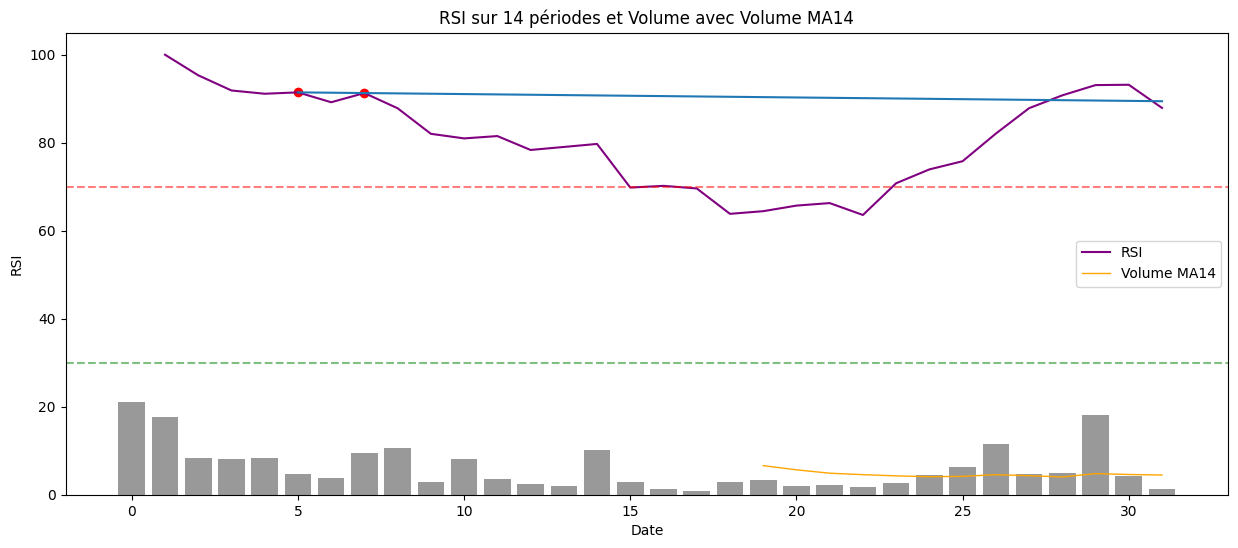

Asset: CREAMUSDT, Score: 2, URL: https://www.tradingview.com/chart/?symbol=BINANCE:CREAMUSDT&interval=1W


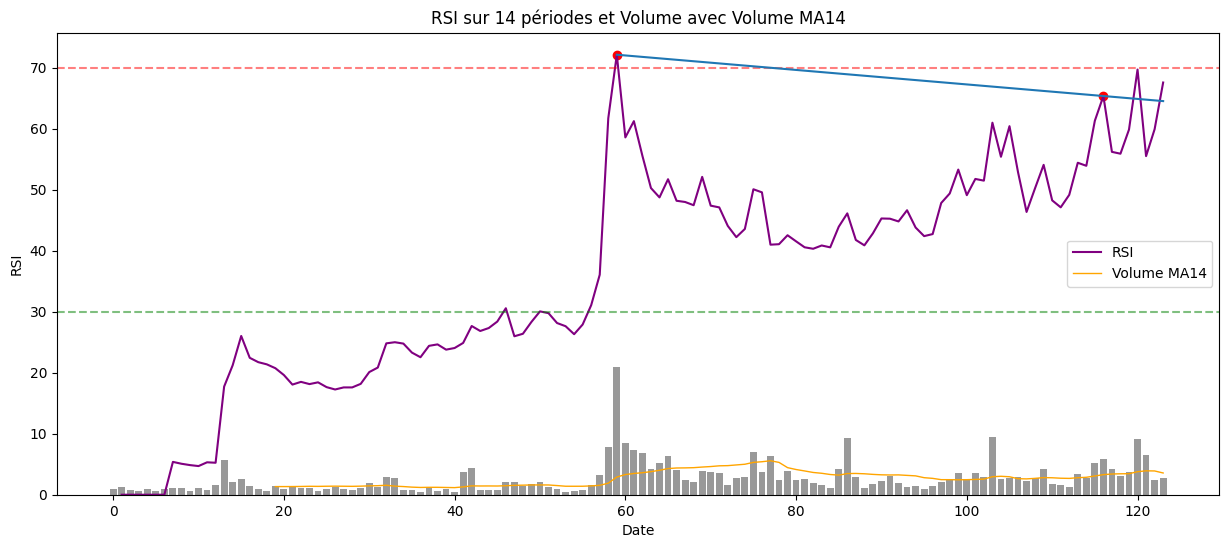

Asset: HIGHUSDT, Score: 2, URL: https://www.tradingview.com/chart/?symbol=BINANCE:HIGHUSDT&interval=1W


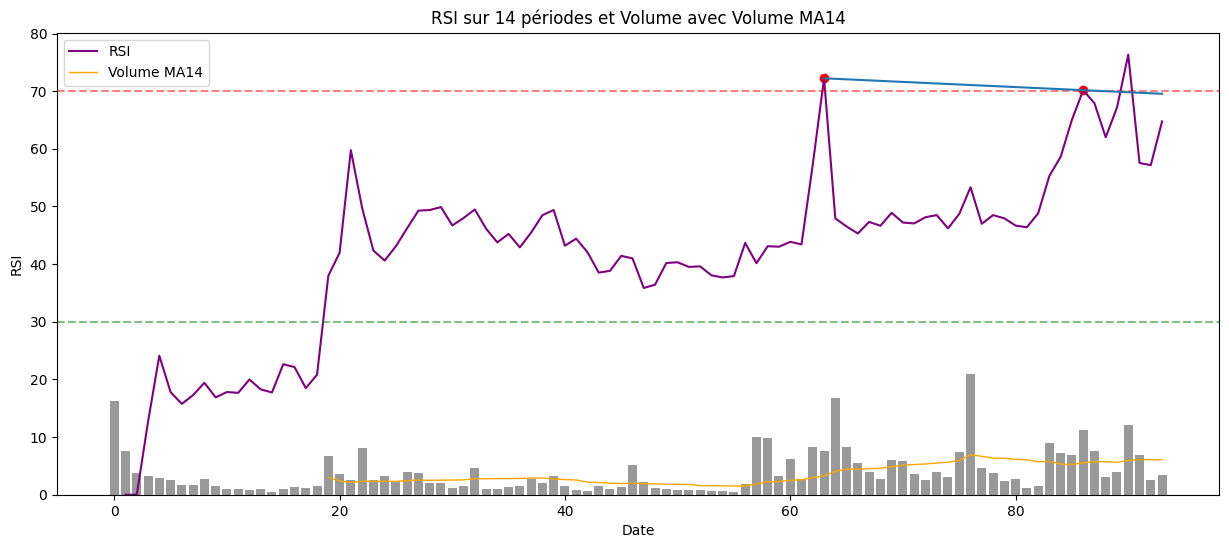

Asset: LEVERUSDT, Score: 2, URL: https://www.tradingview.com/chart/?symbol=BINANCE:LEVERUSDT&interval=1W


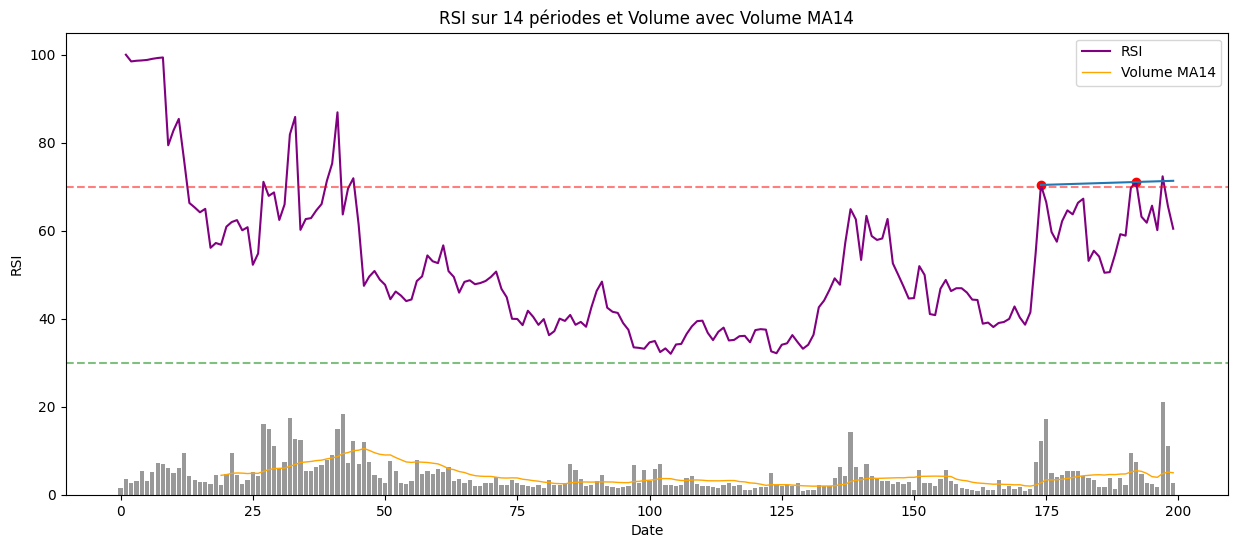

Asset: NEOUSDT, Score: 2, URL: https://www.tradingview.com/chart/?symbol=BINANCE:NEOUSDT&interval=1W


In [1]:
from src.mtal import screen_best_asset

screen_best_asset(limit=400)

## Stocks

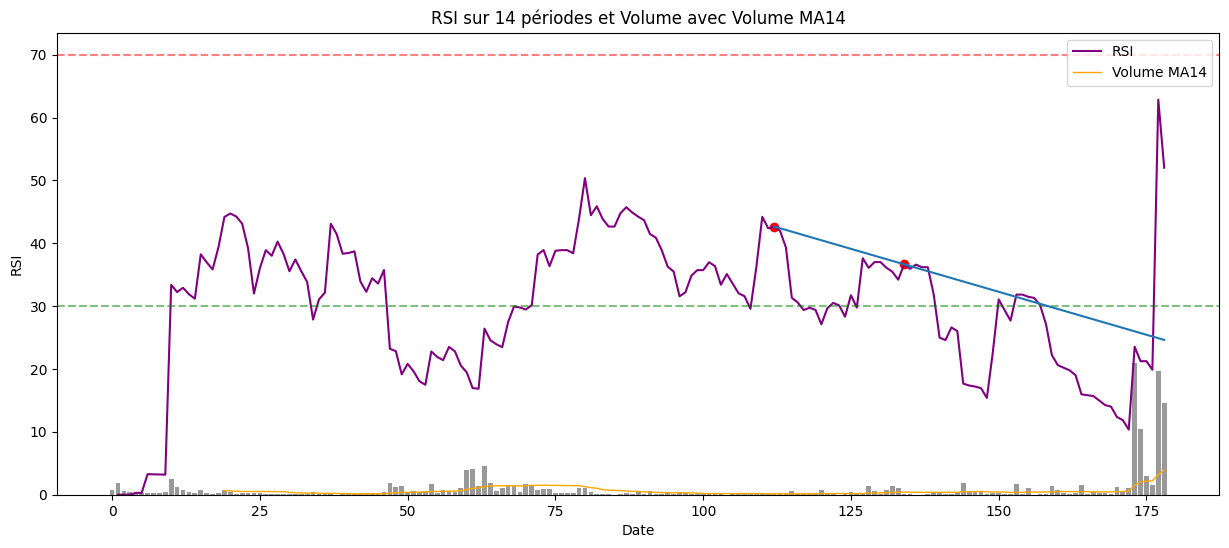

Asset: ALCHI.PA, Score: 9, URL: https://www.tradingview.com/chart/?symbol=ALCHI&interval=1W


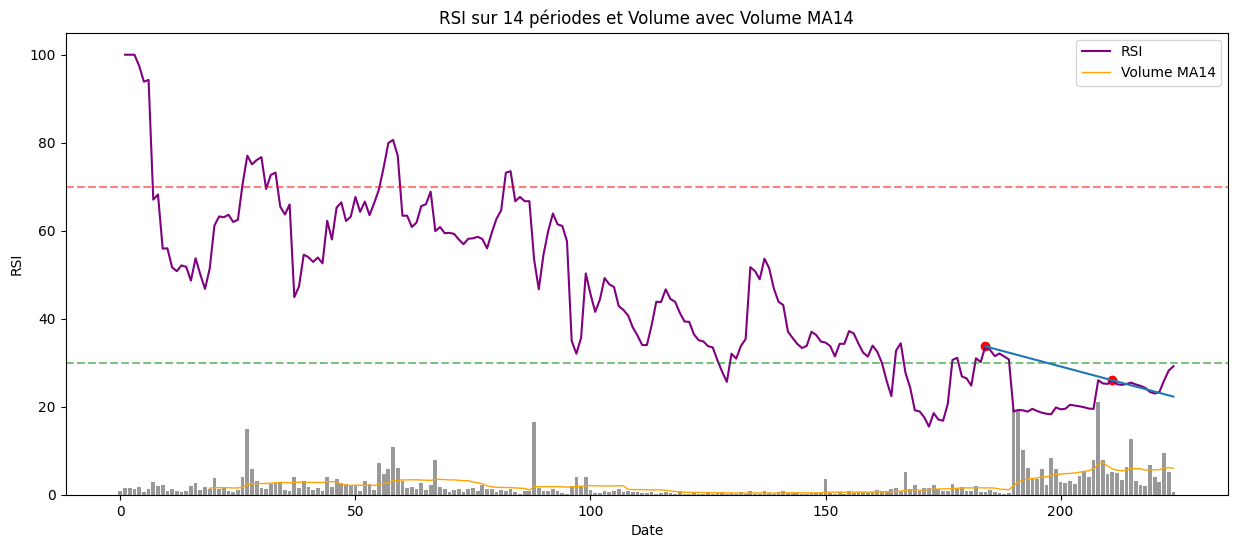

Asset: NHOA.PA, Score: 9, URL: https://www.tradingview.com/chart/?symbol=NHOA&interval=1W


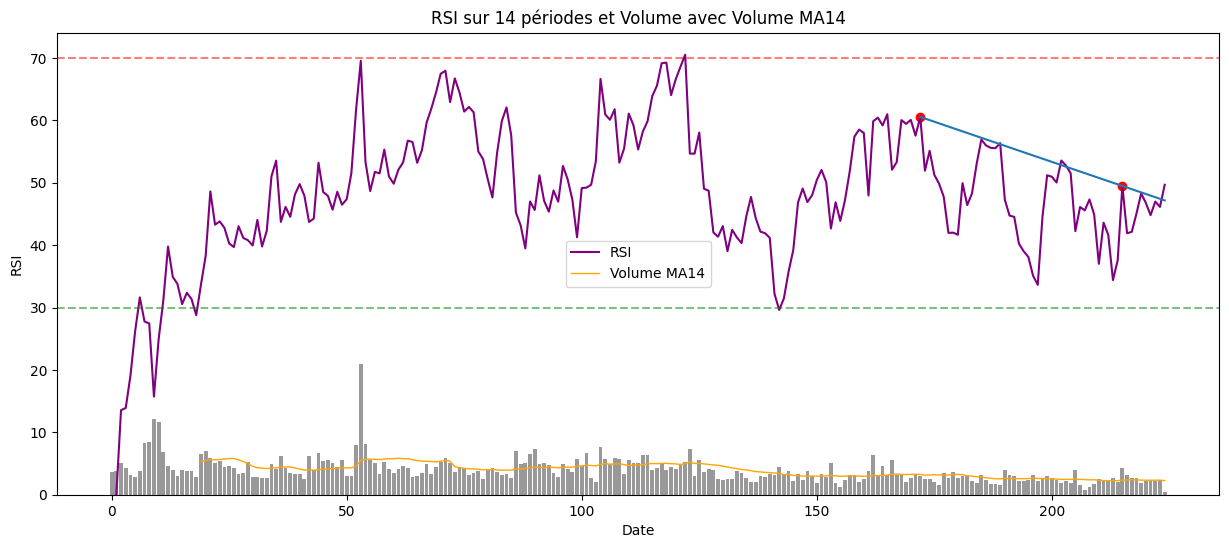

Asset: CA.PA, Score: 8, URL: https://www.tradingview.com/chart/?symbol=CA&interval=1W


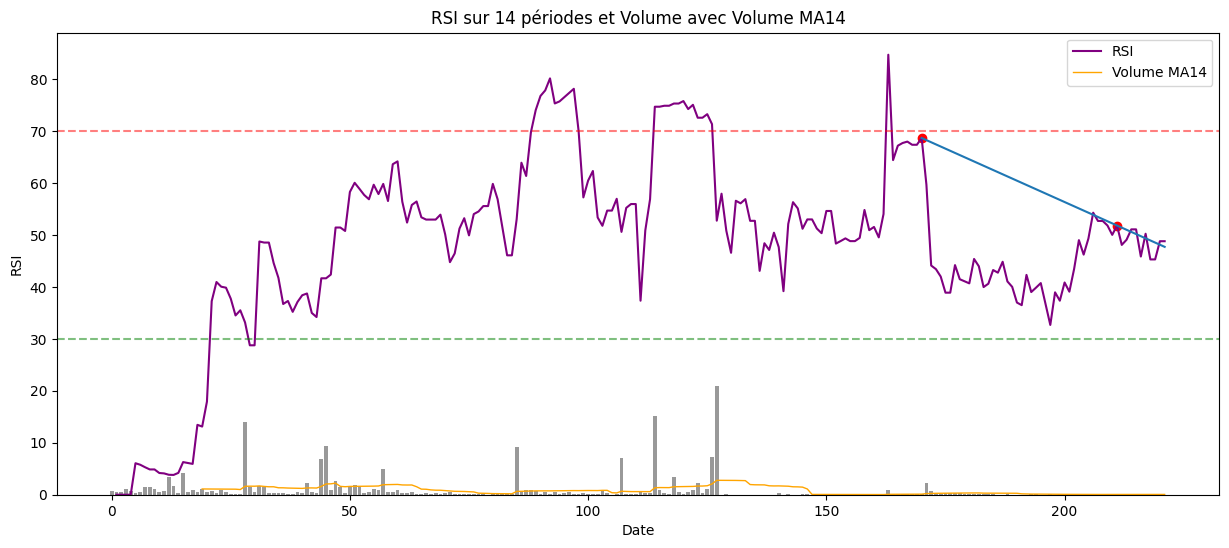

Asset: ALMIL.PA, Score: 7, URL: https://www.tradingview.com/chart/?symbol=ALMIL&interval=1W


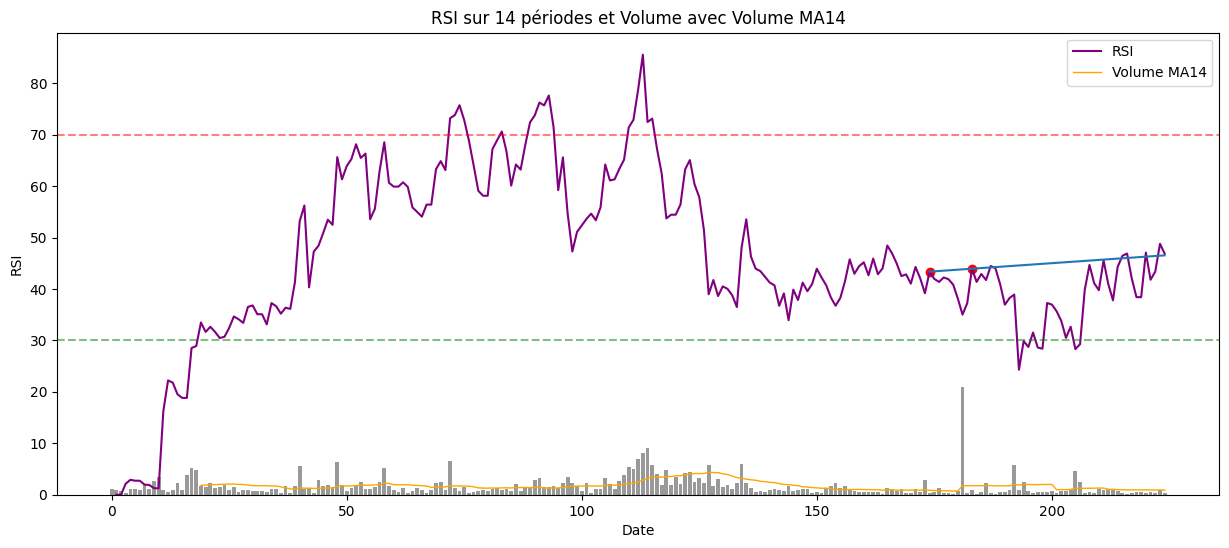

Asset: AURE.PA, Score: 7, URL: https://www.tradingview.com/chart/?symbol=AURE&interval=1W


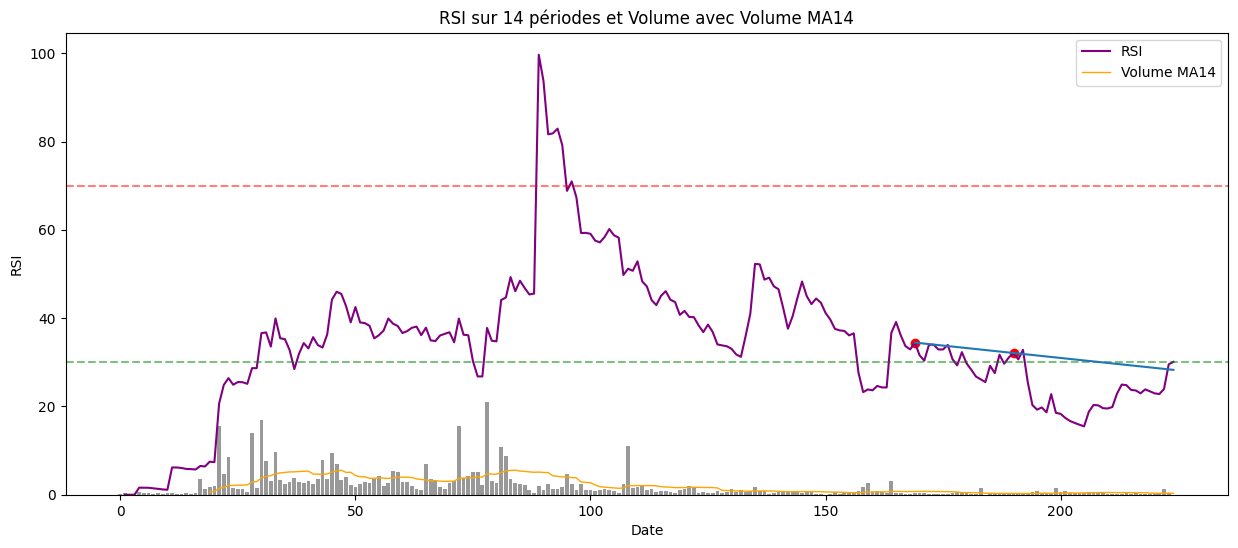

Asset: ALMND.PA, Score: 7, URL: https://www.tradingview.com/chart/?symbol=ALMND&interval=1W


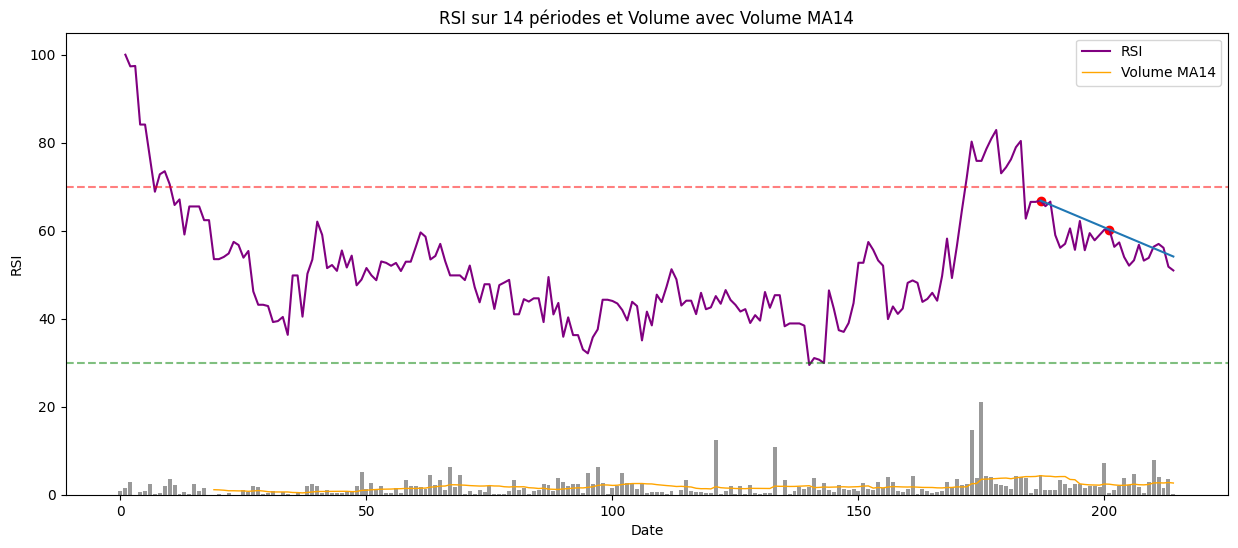

Asset: HDP.PA, Score: 6, URL: https://www.tradingview.com/chart/?symbol=HDP&interval=1W


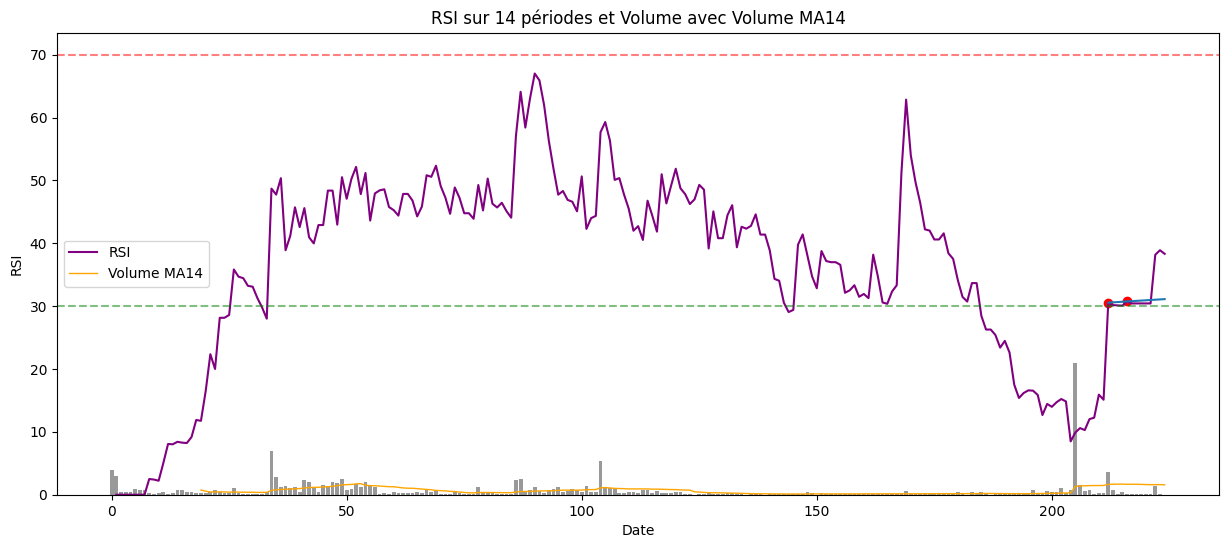

Asset: ALARF.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=ALARF&interval=1W


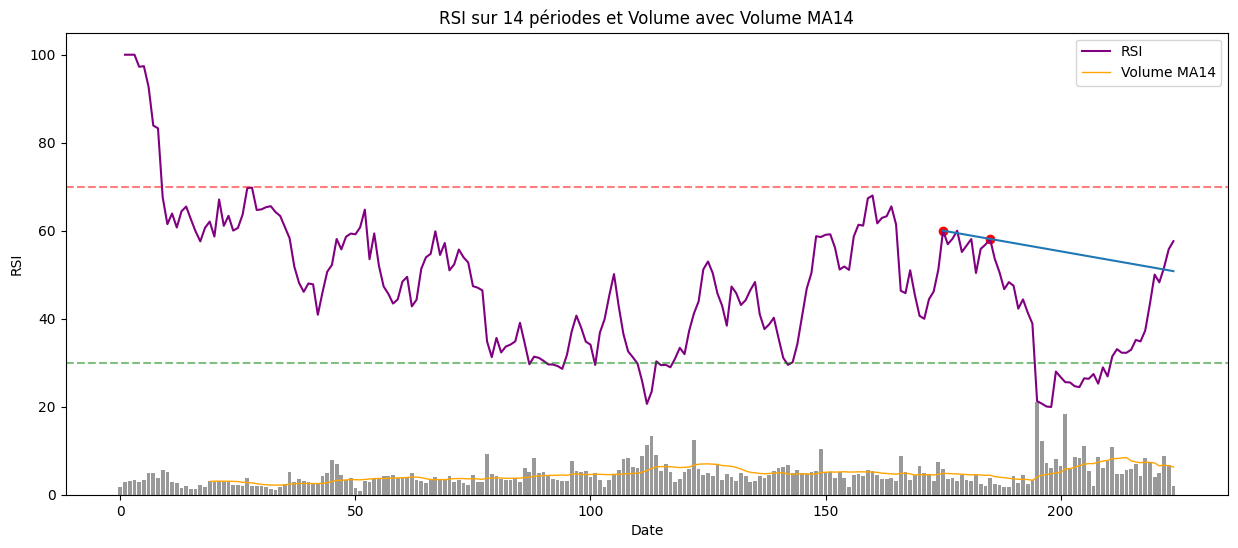

Asset: ALO.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=ALO&interval=1W


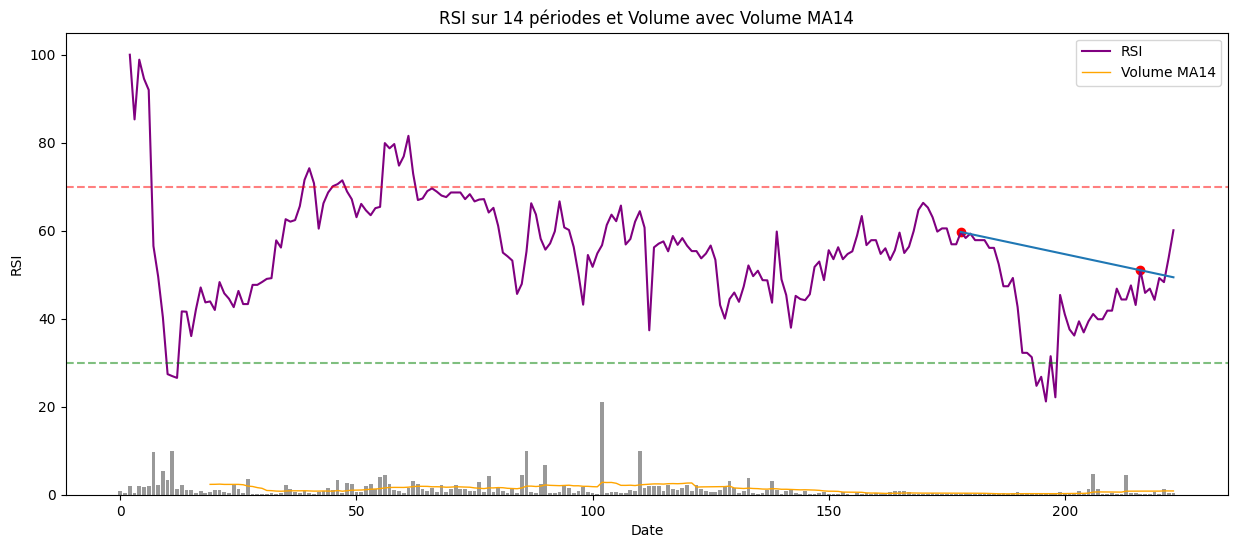

Asset: LTA.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=LTA&interval=1W


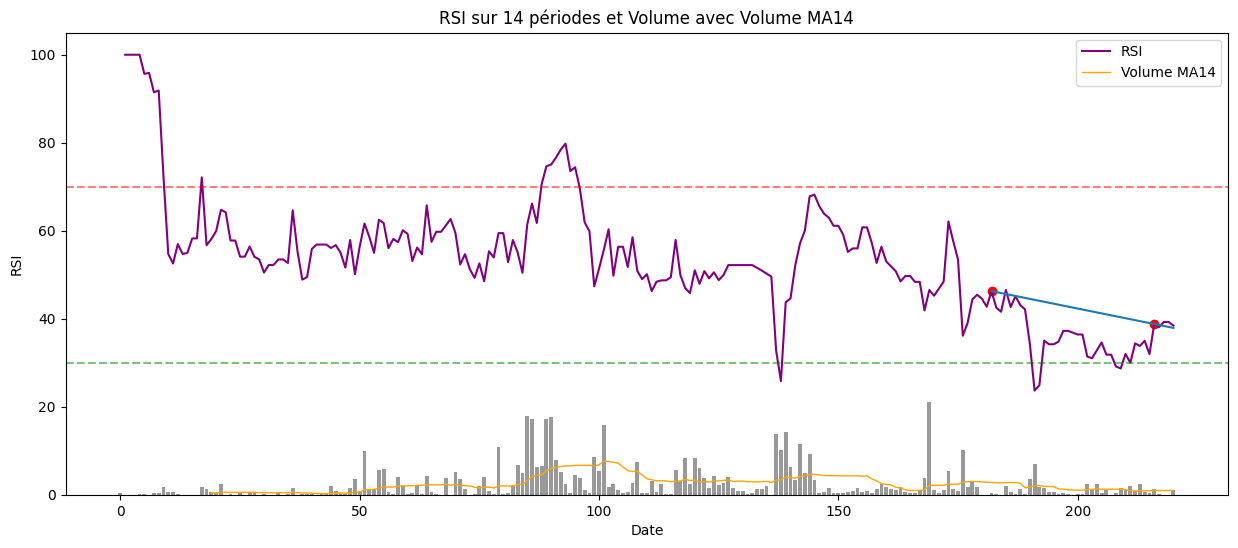

Asset: ARTE.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=ARTE&interval=1W


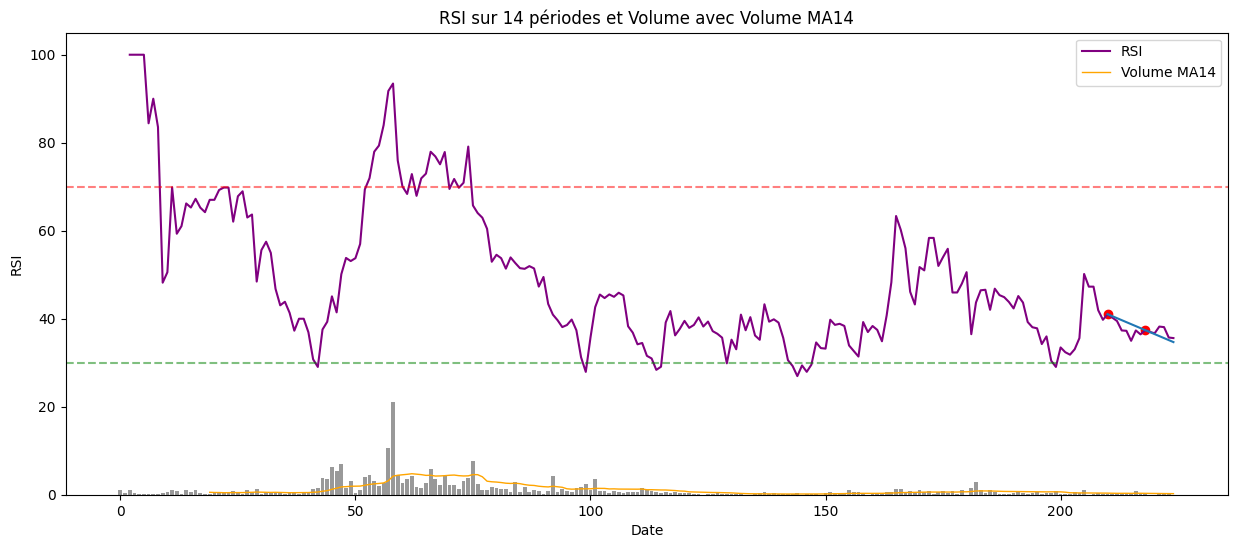

Asset: CNV.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=CNV&interval=1W


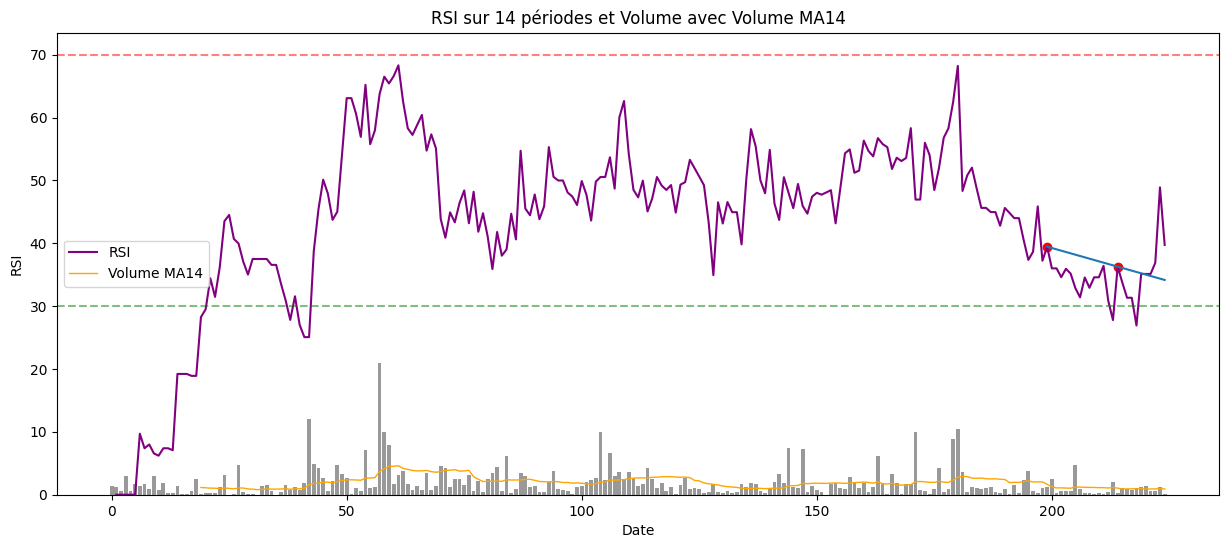

Asset: ALDUB.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=ALDUB&interval=1W


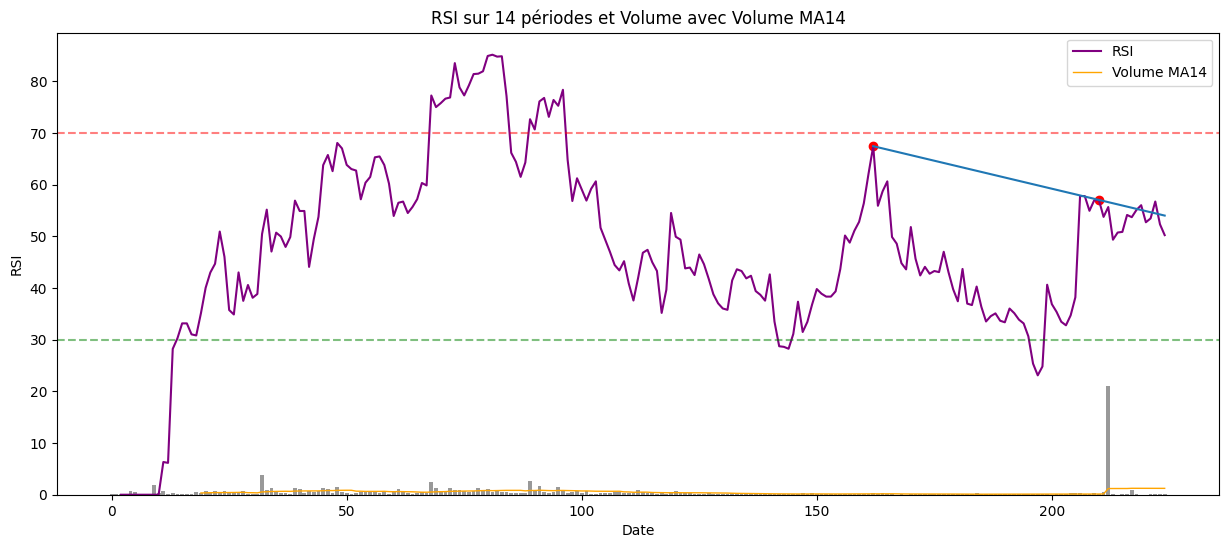

Asset: SFPI.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=SFPI&interval=1W


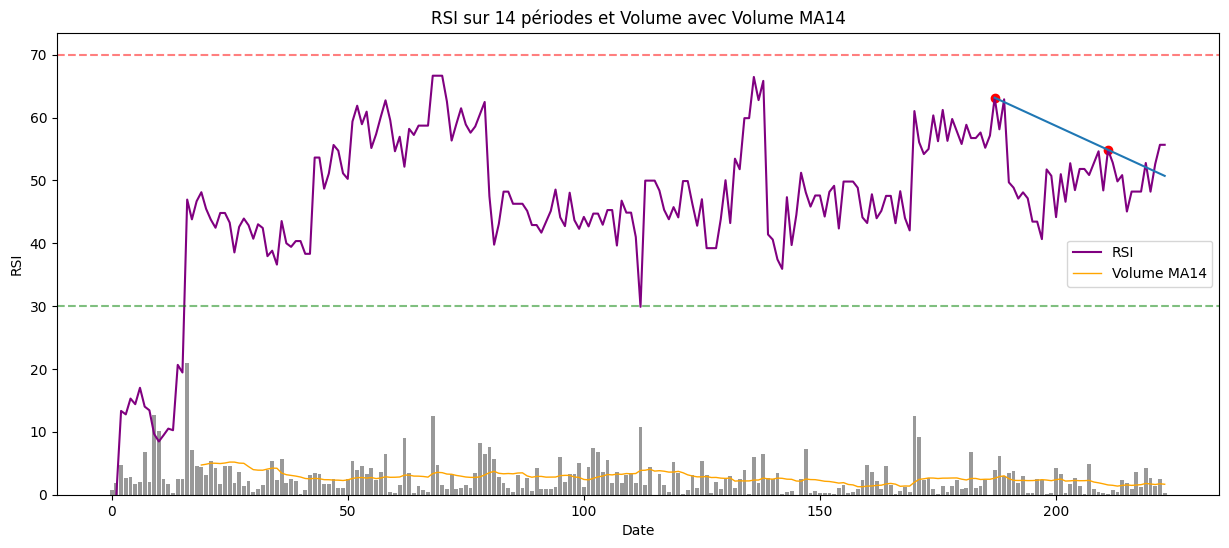

Asset: ALHIT.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=ALHIT&interval=1W


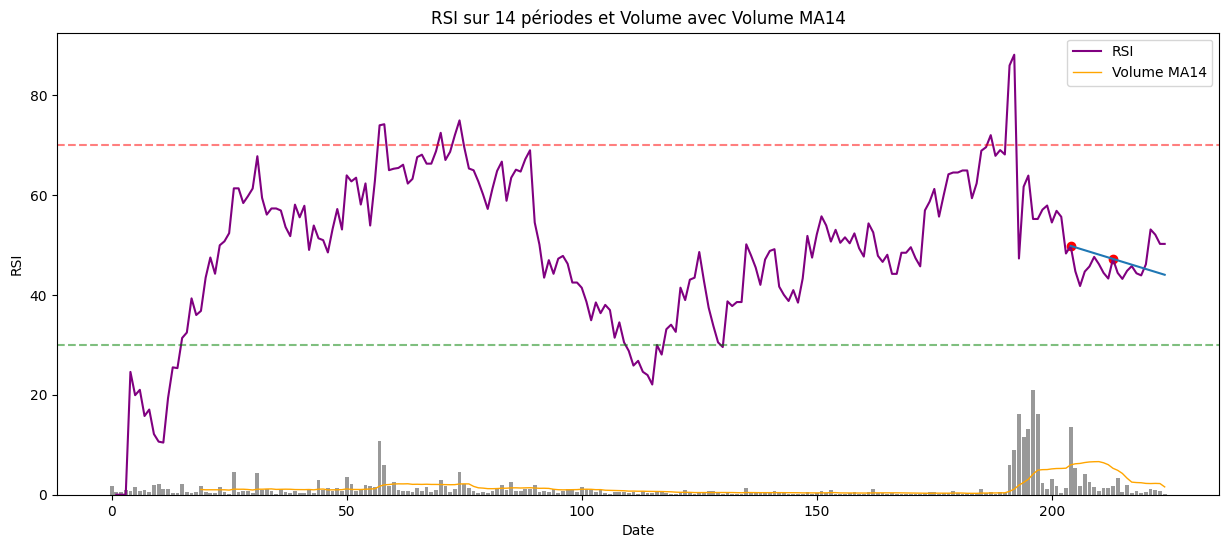

Asset: ALINN.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=ALINN&interval=1W


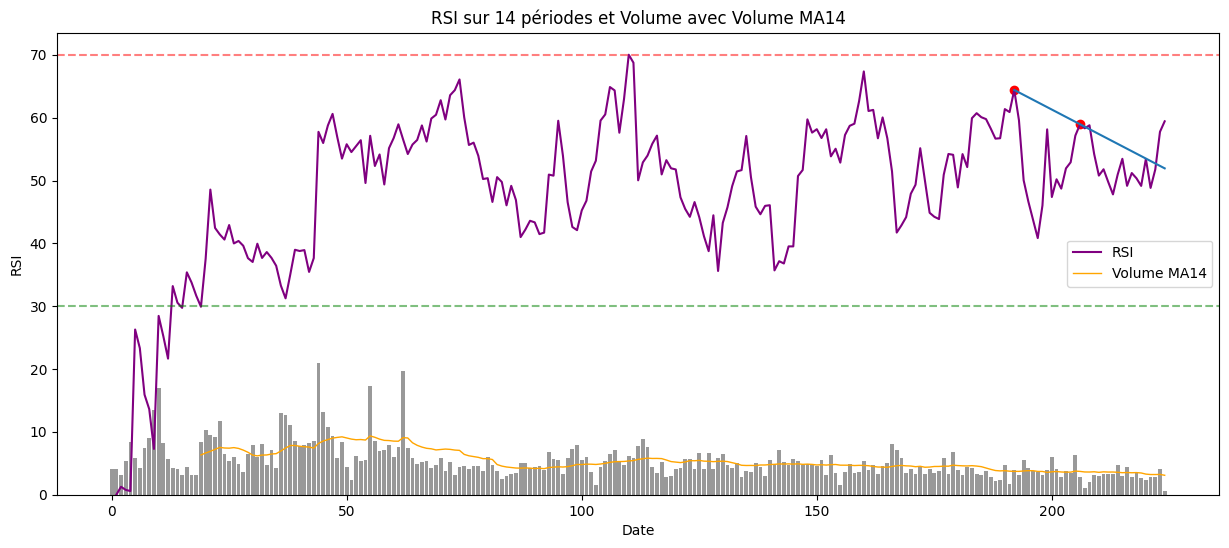

Asset: LI.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=LI&interval=1W


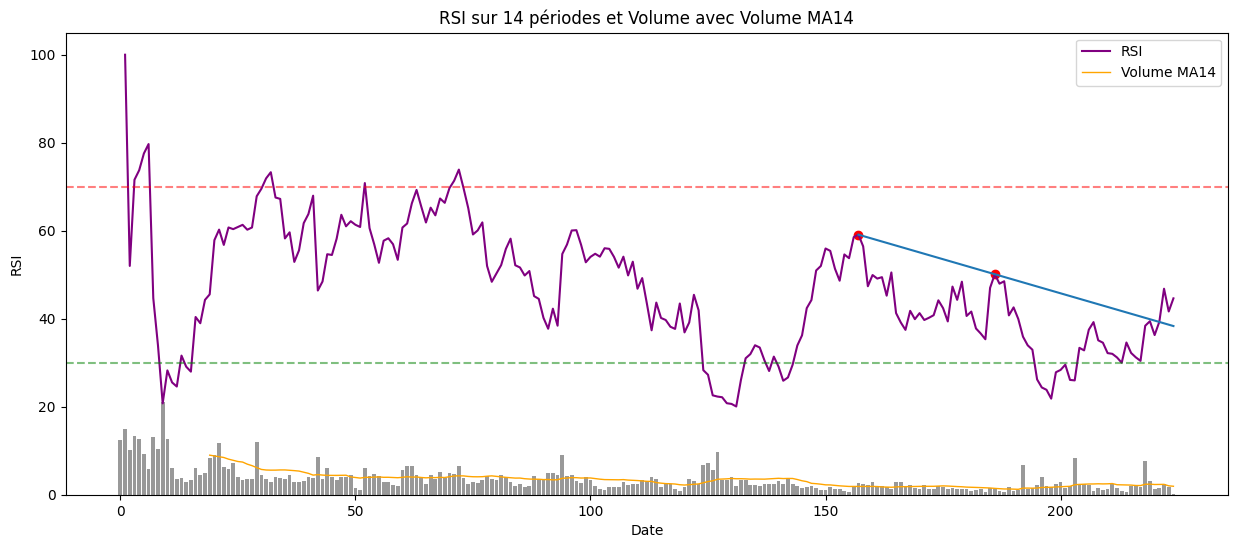

Asset: MDM.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=MDM&interval=1W


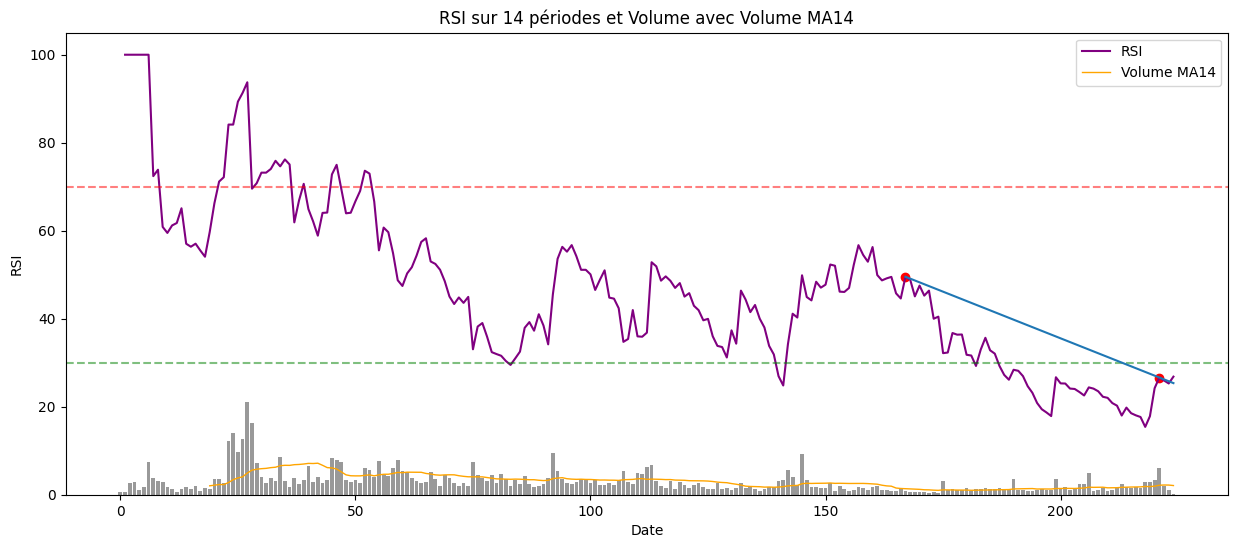

Asset: MCPHY.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=MCPHY&interval=1W


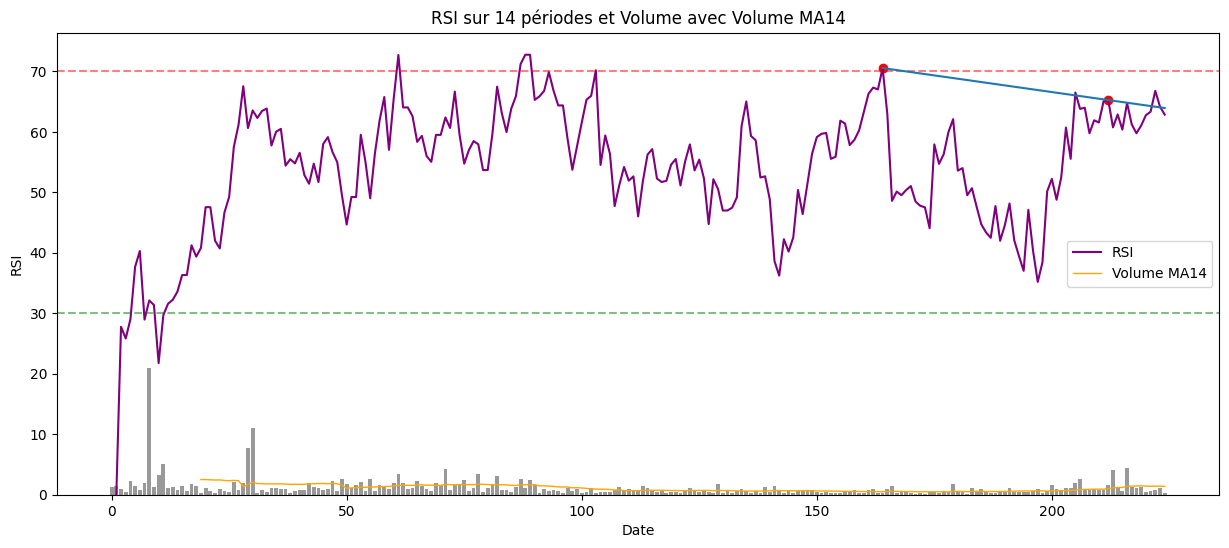

Asset: NRO.PA, Score: 5, URL: https://www.tradingview.com/chart/?symbol=NRO&interval=1W


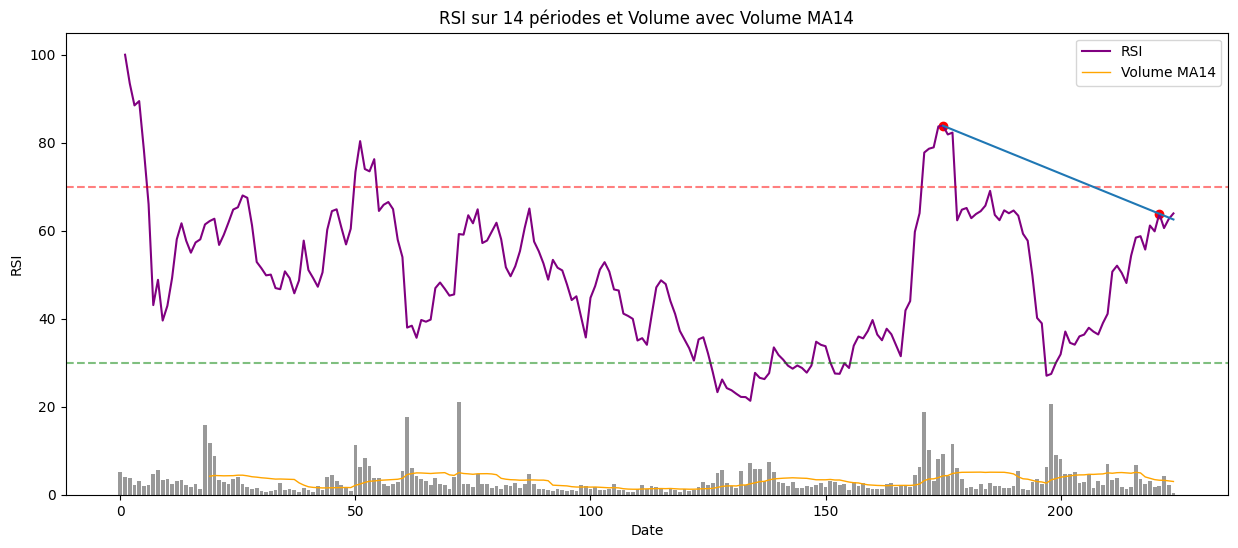

Asset: ABVX.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=ABVX&interval=1W


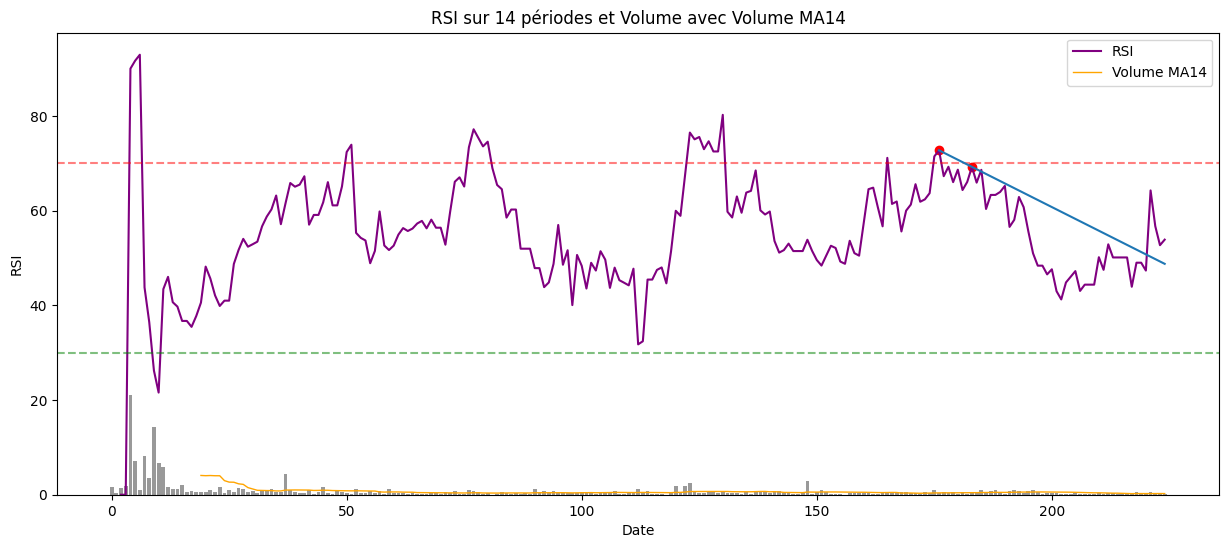

Asset: BAIN.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=BAIN&interval=1W


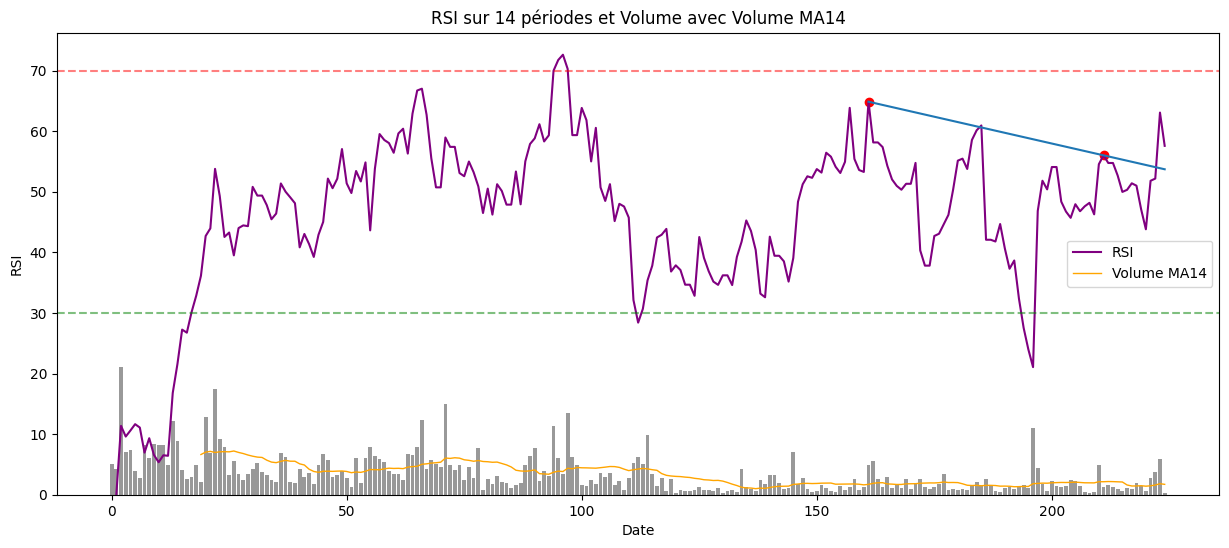

Asset: ALCIS.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=ALCIS&interval=1W


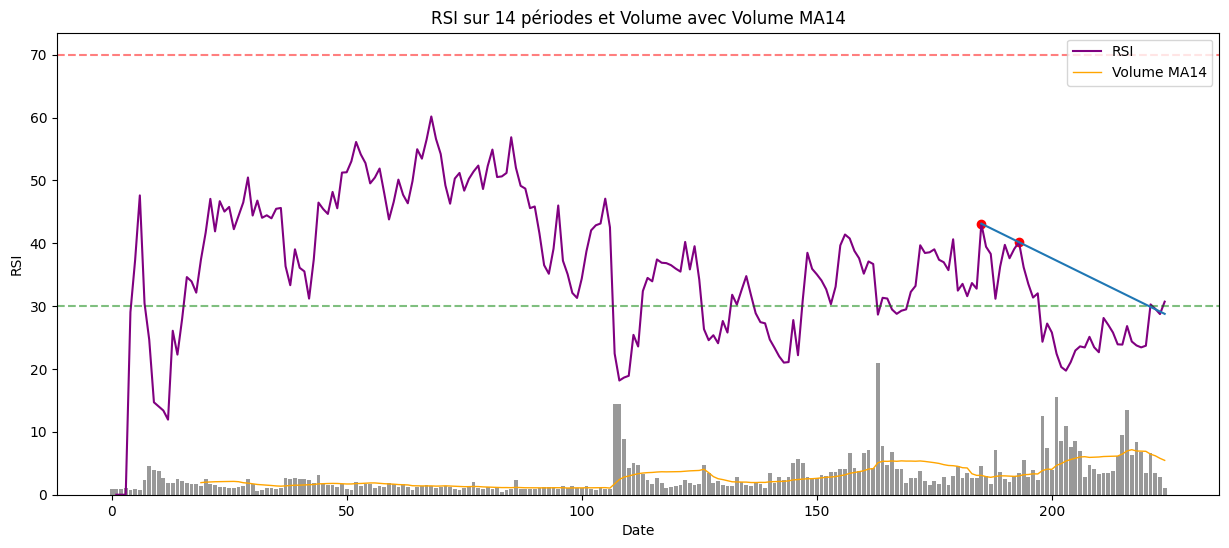

Asset: CLARI.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=CLARI&interval=1W


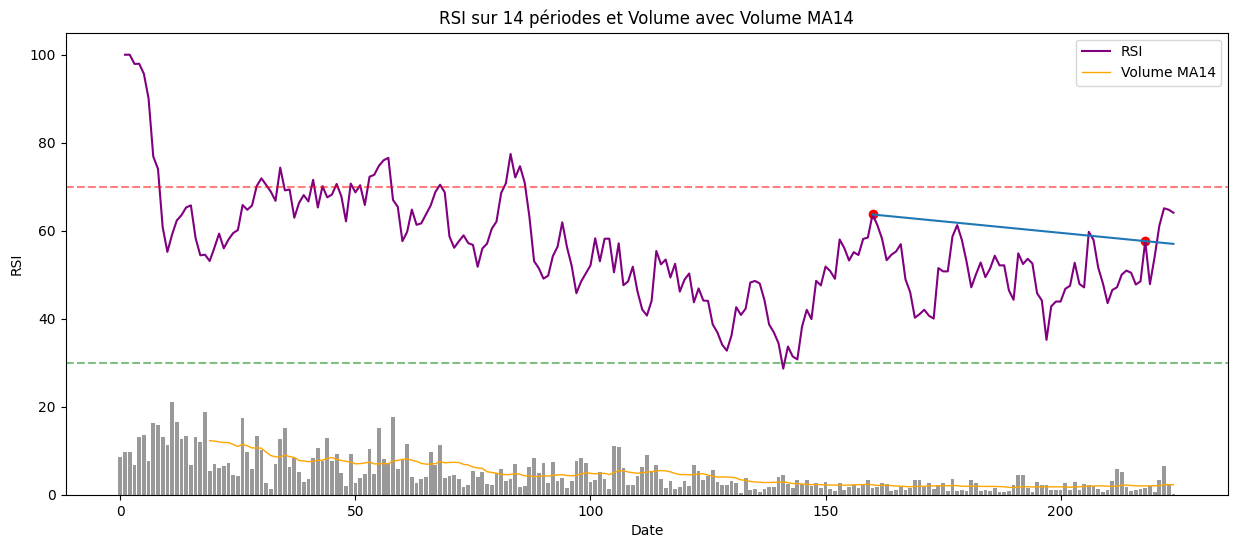

Asset: ALDLT.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=ALDLT&interval=1W


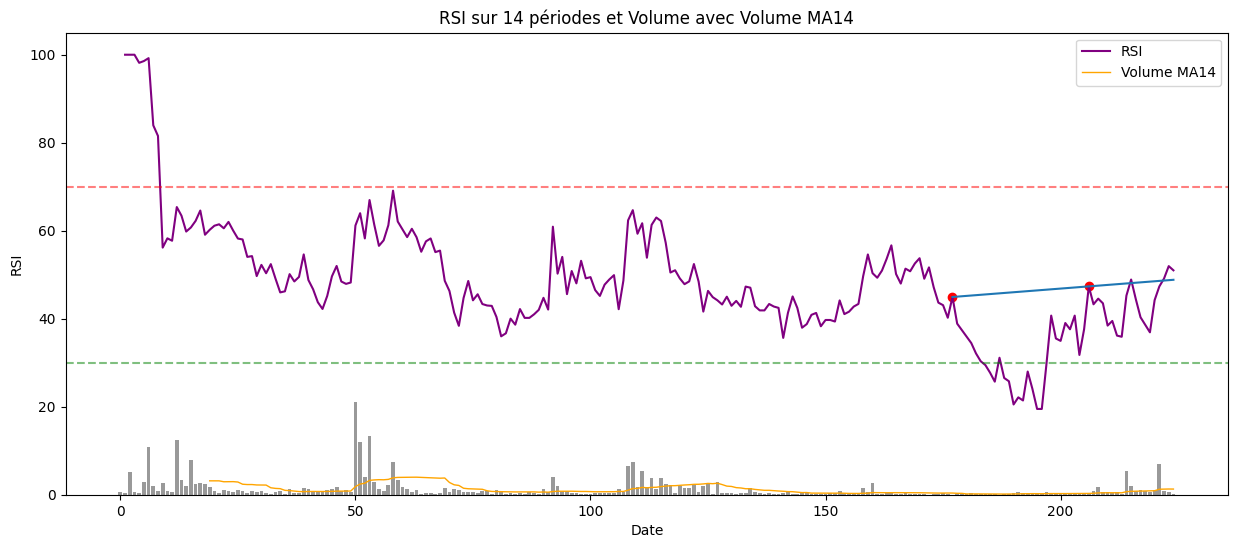

Asset: ALKKO.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=ALKKO&interval=1W


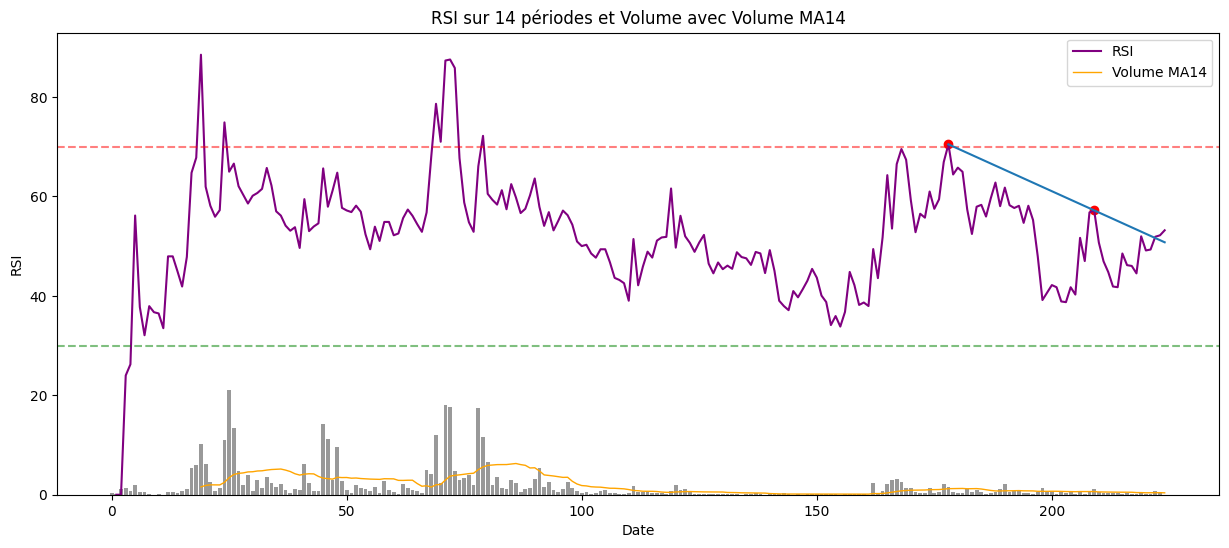

Asset: ALKLA.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=ALKLA&interval=1W


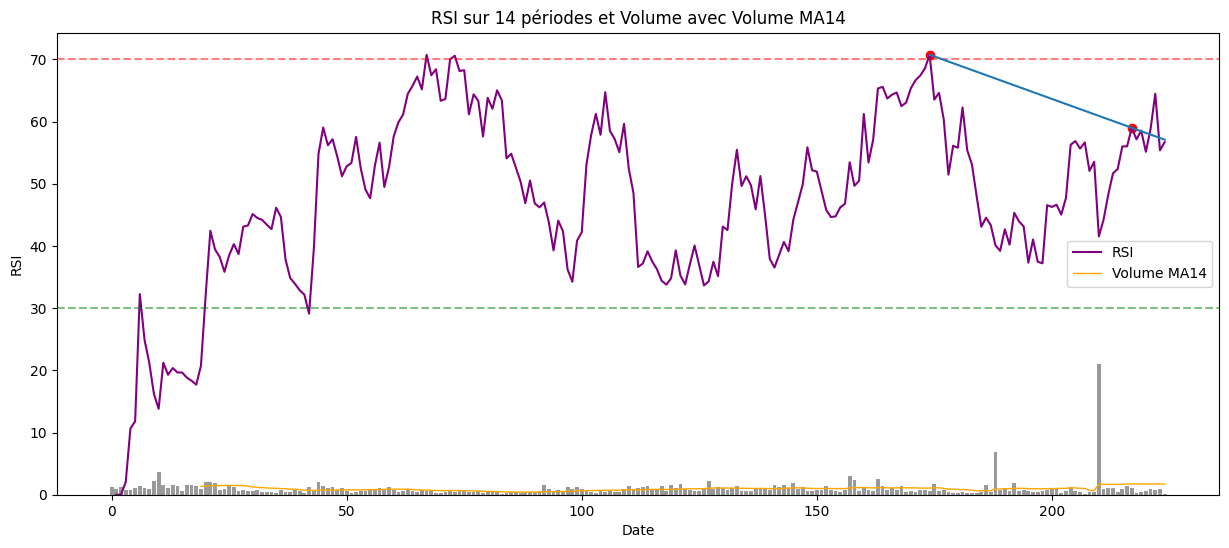

Asset: FII.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=FII&interval=1W


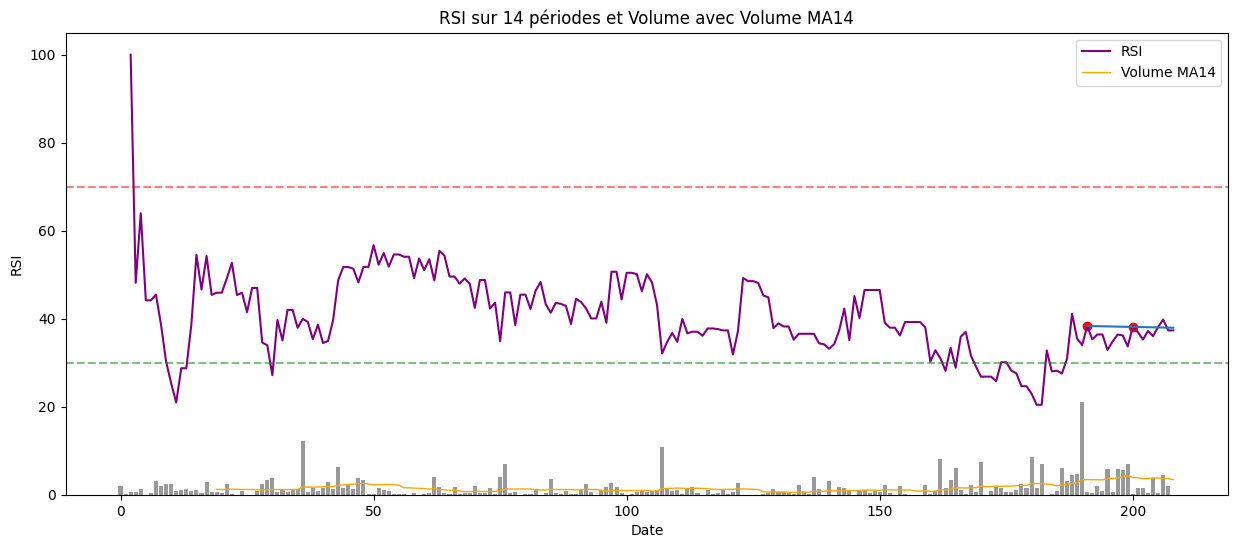

Asset: MLNMA.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=MLNMA&interval=1W


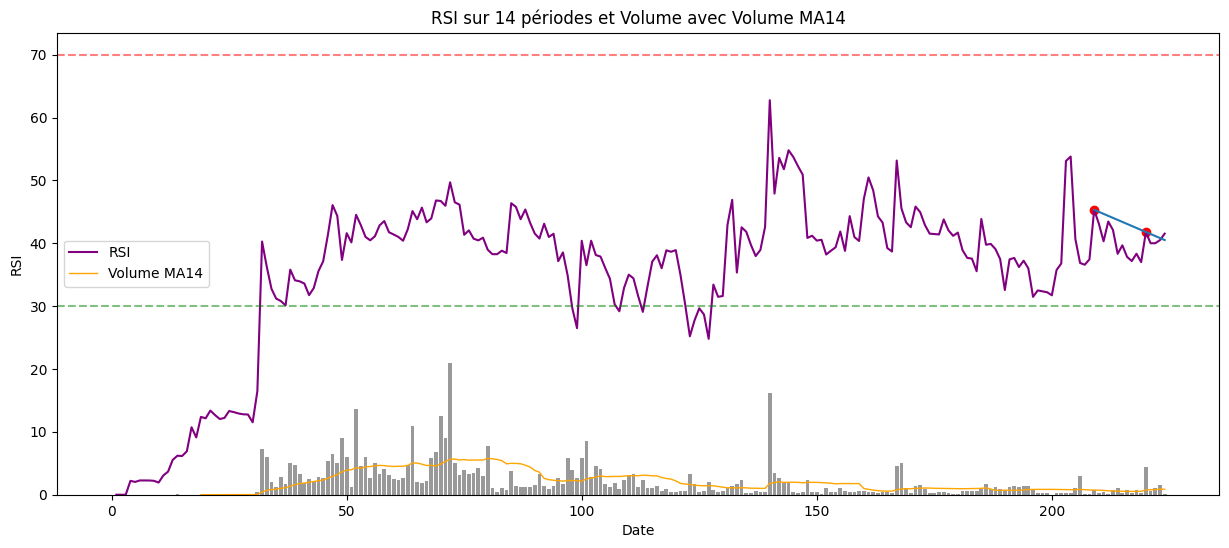

Asset: ALNMG.PA, Score: 4, URL: https://www.tradingview.com/chart/?symbol=ALNMG&interval=1W


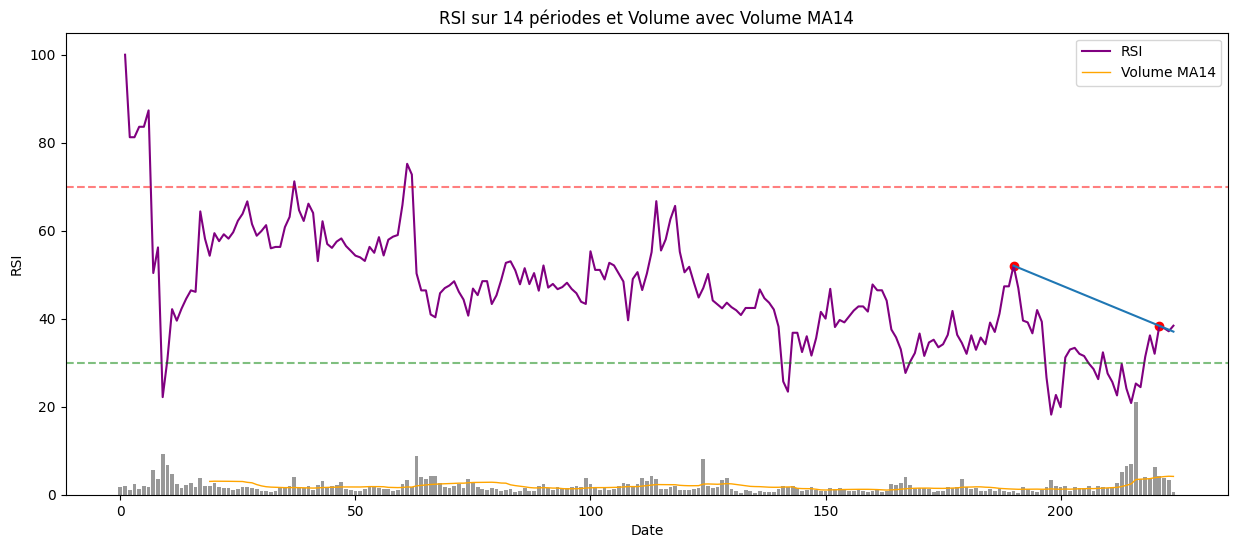

Asset: ABCA.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ABCA&interval=1W


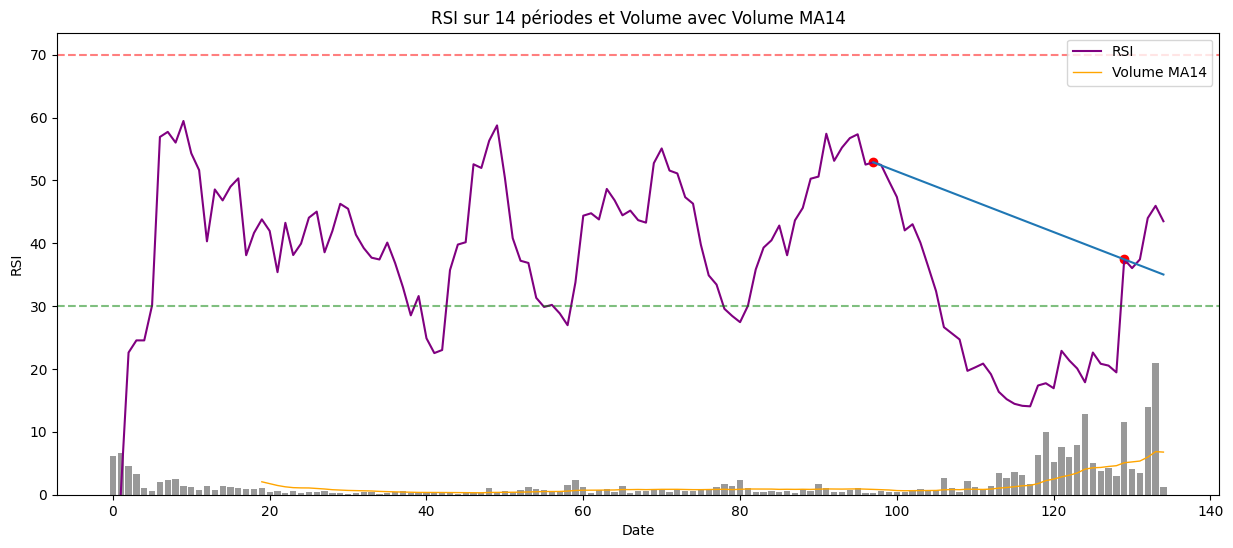

Asset: ALAFY.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALAFY&interval=1W


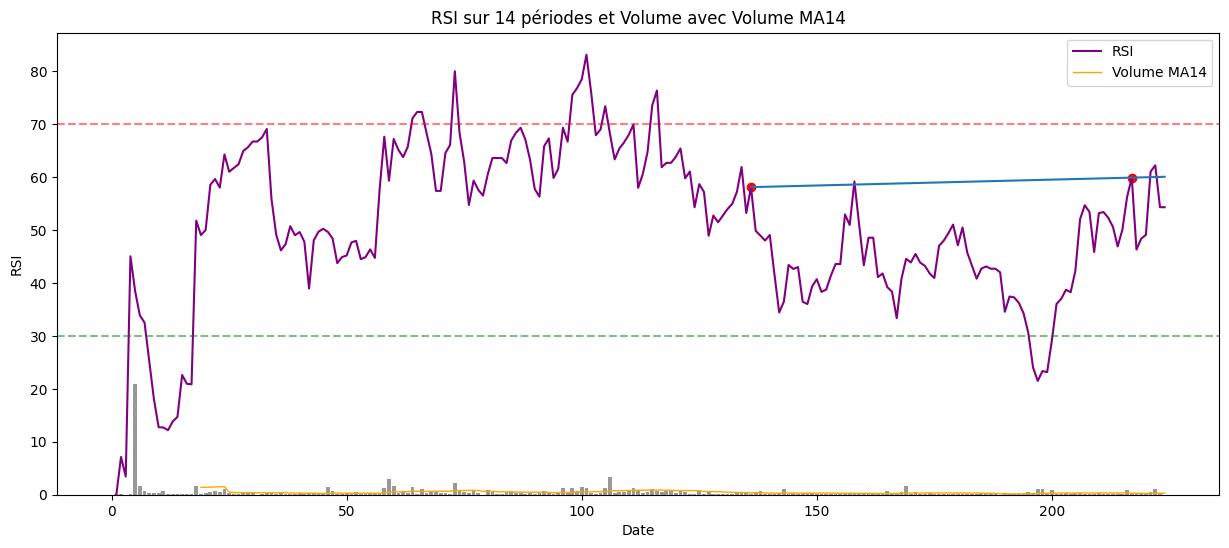

Asset: ALBLD.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALBLD&interval=1W


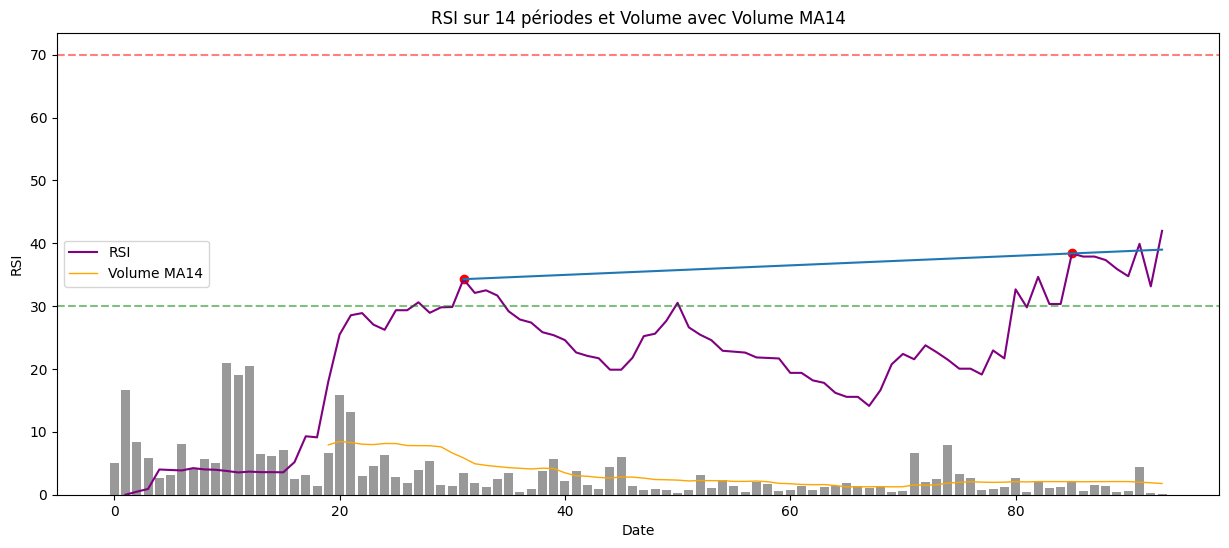

Asset: ALCWE.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALCWE&interval=1W


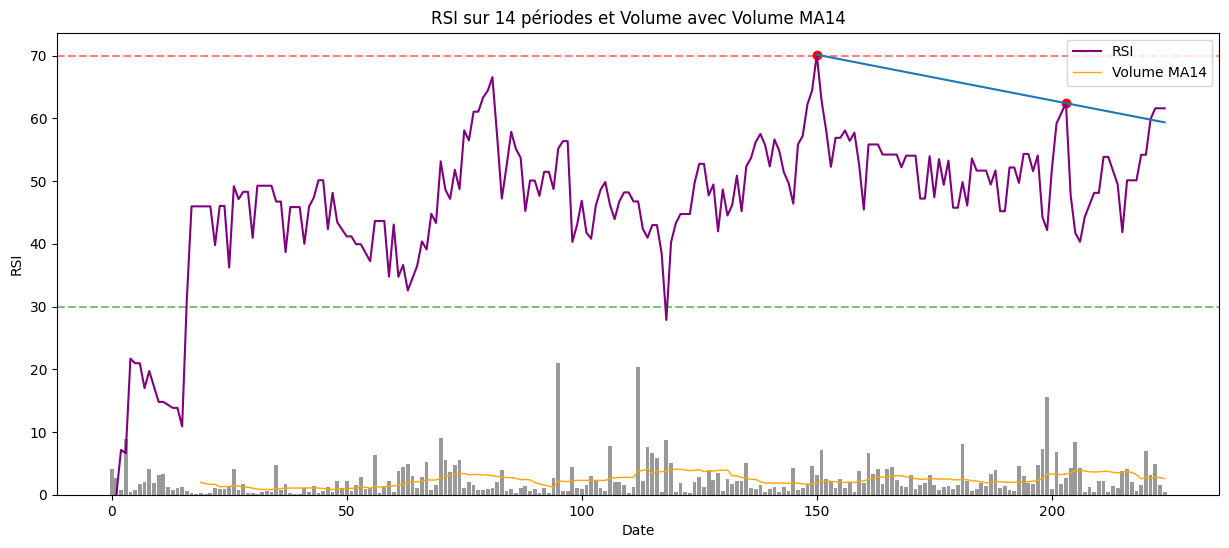

Asset: MLCMB.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=MLCMB&interval=1W


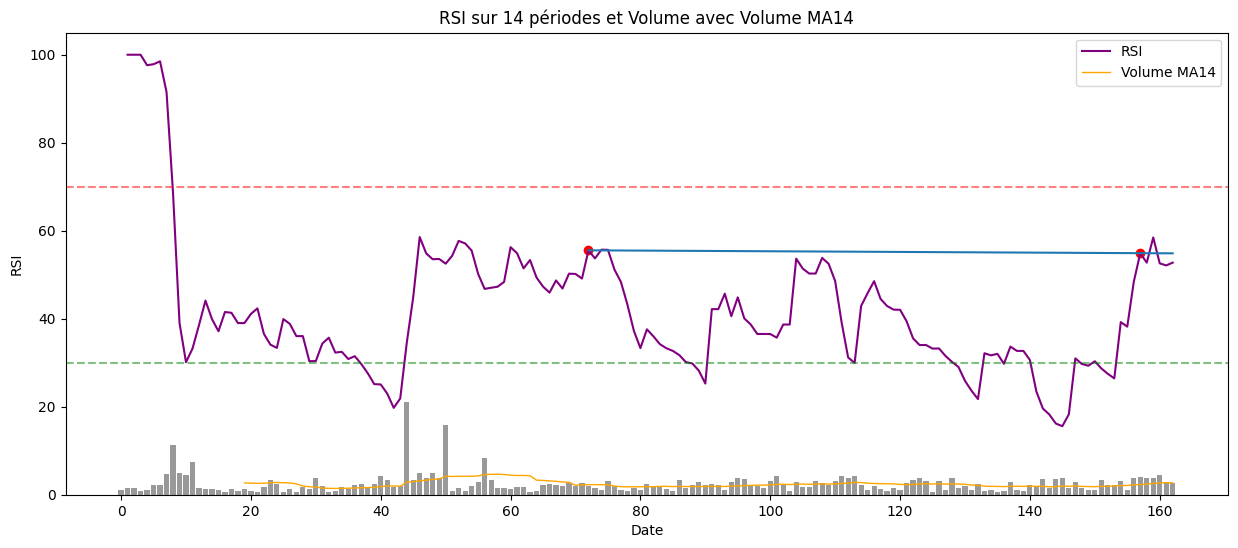

Asset: CCN.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=CCN&interval=1W


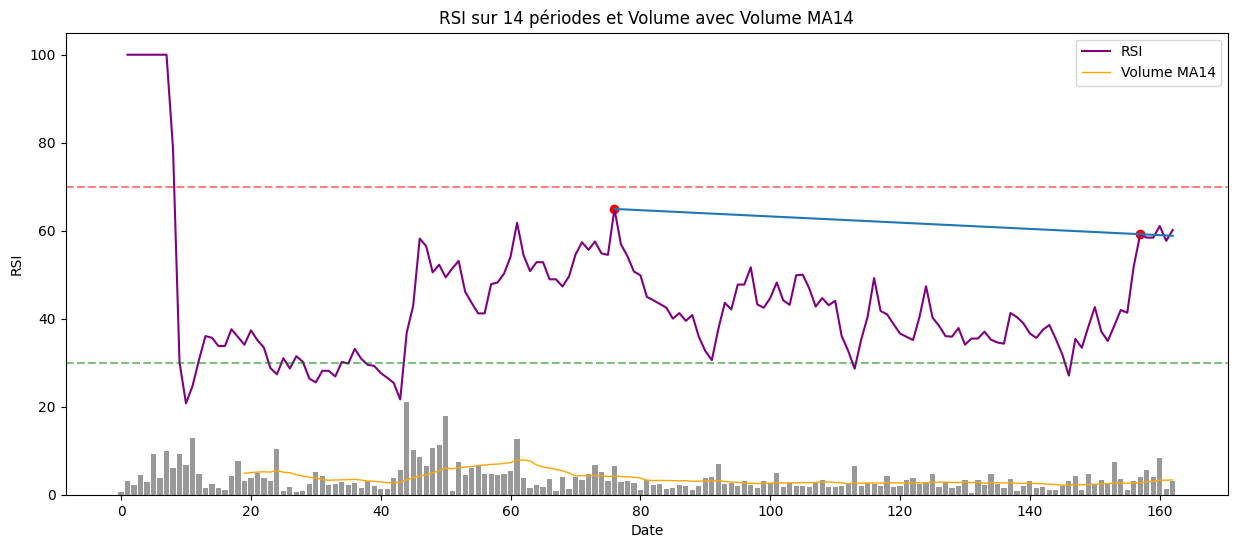

Asset: CRSU.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=CRSU&interval=1W


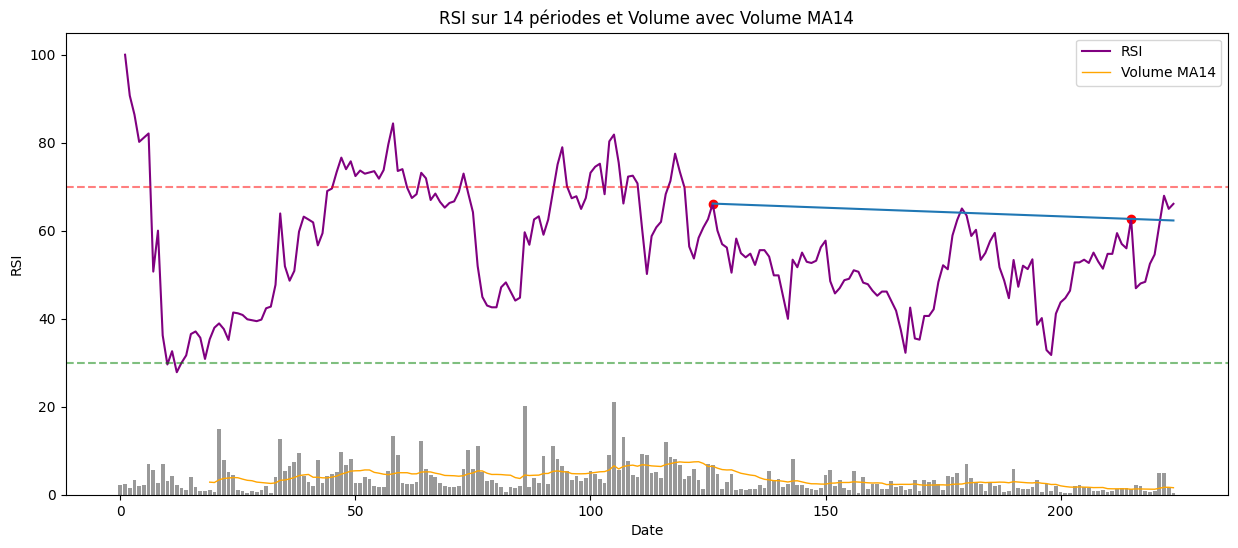

Asset: DKUPL.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=DKUPL&interval=1W


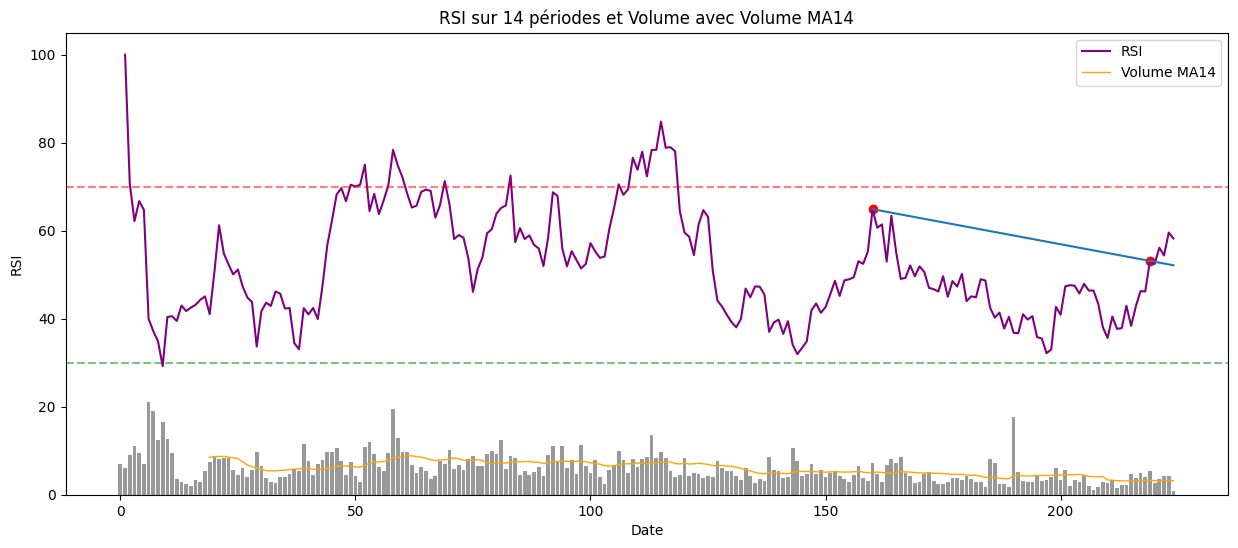

Asset: ERA.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ERA&interval=1W


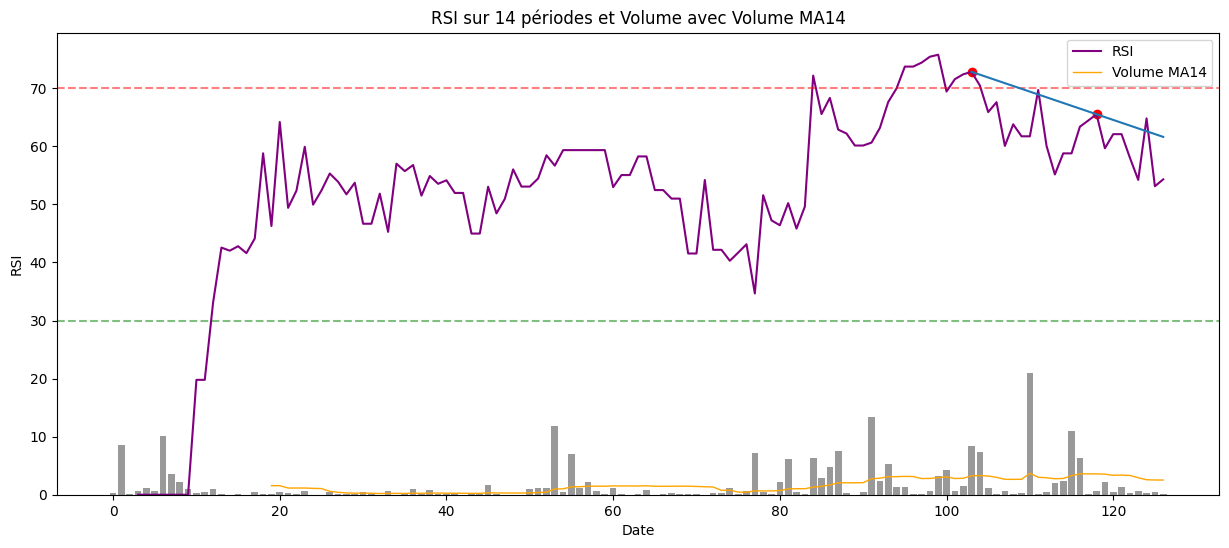

Asset: BERR.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=BERR&interval=1W


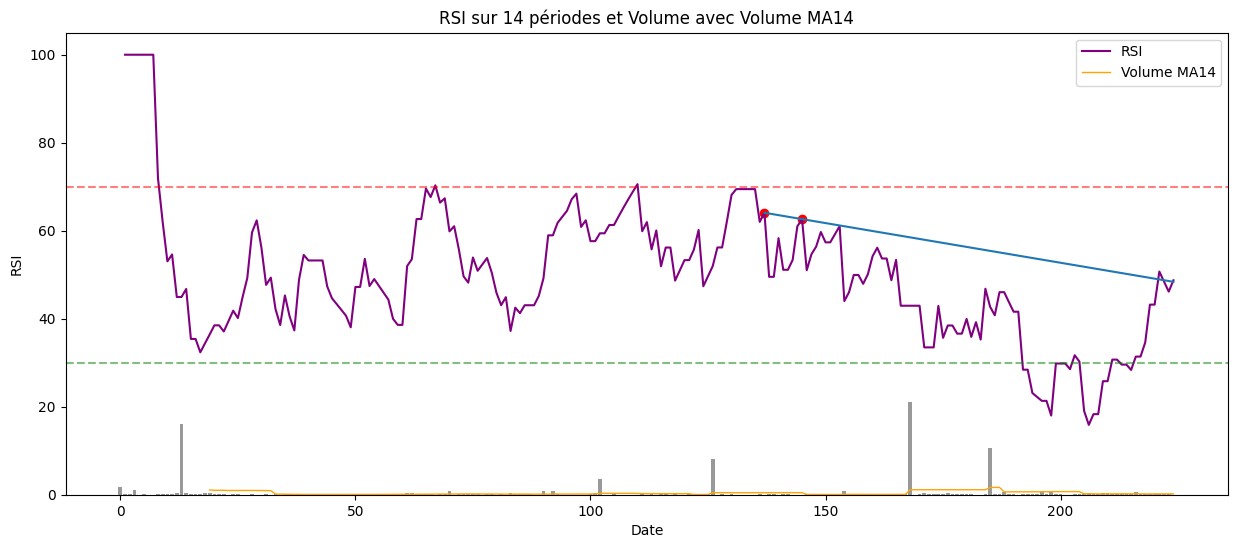

Asset: FREY.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=FREY&interval=1W


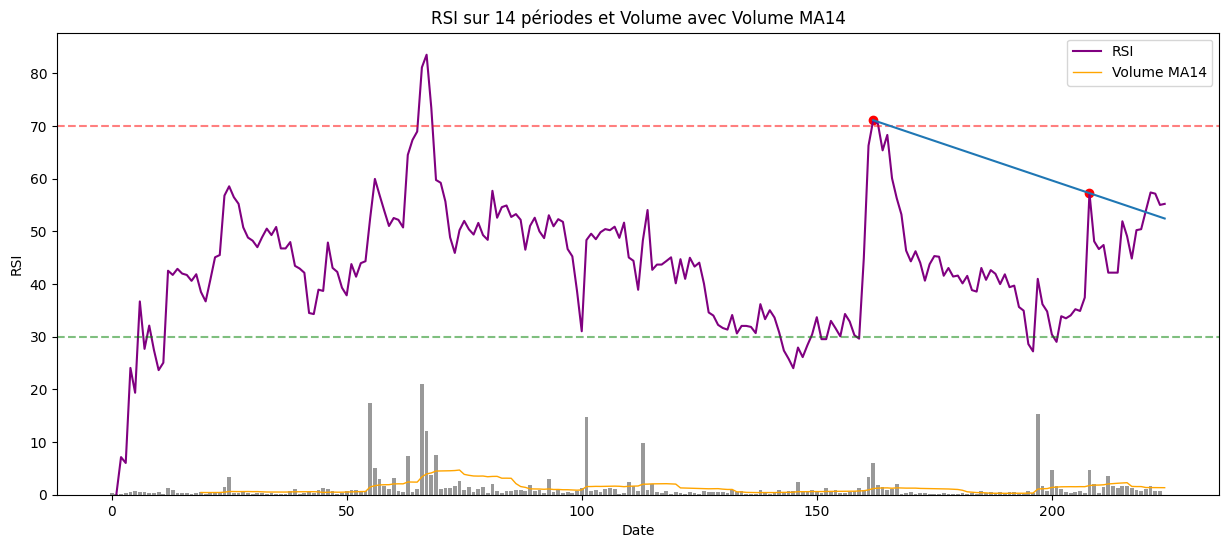

Asset: GNRO.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=GNRO&interval=1W


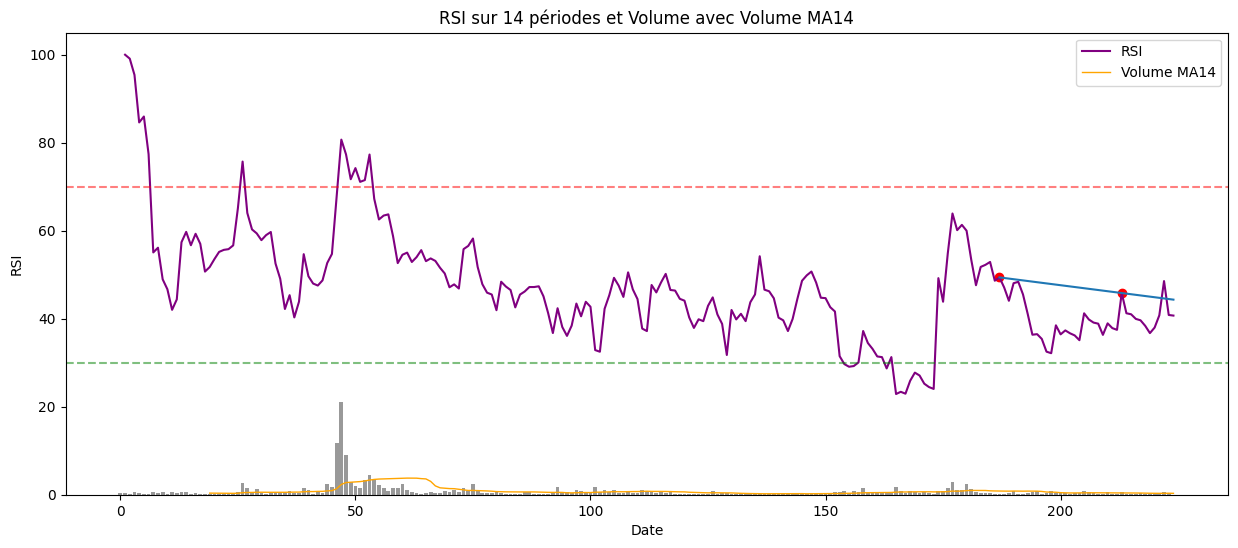

Asset: ALGBE.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALGBE&interval=1W


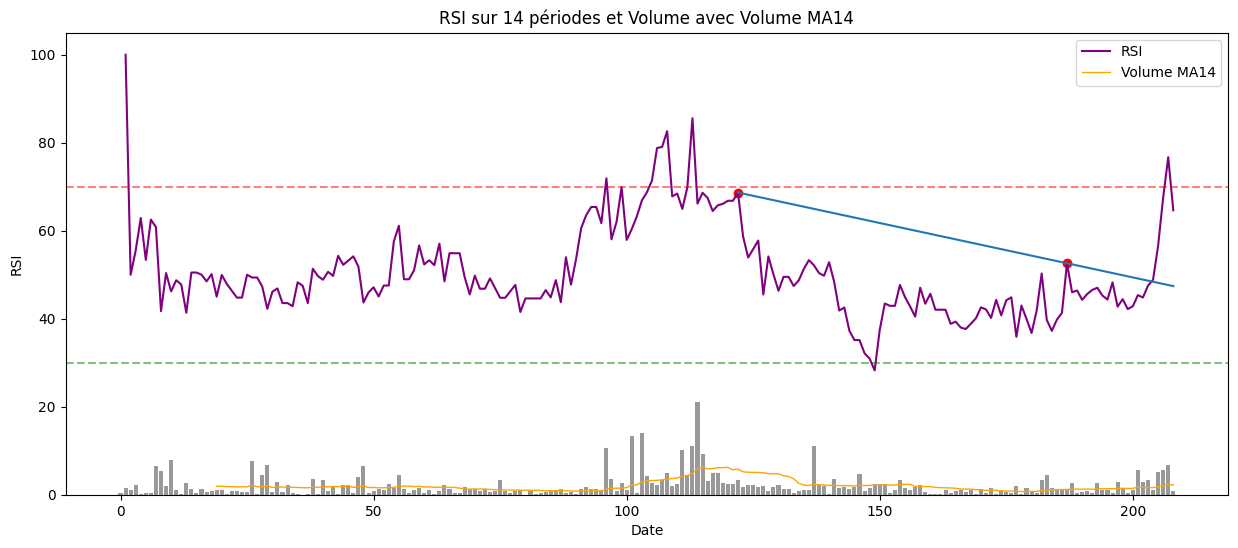

Asset: ALGLD.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALGLD&interval=1W


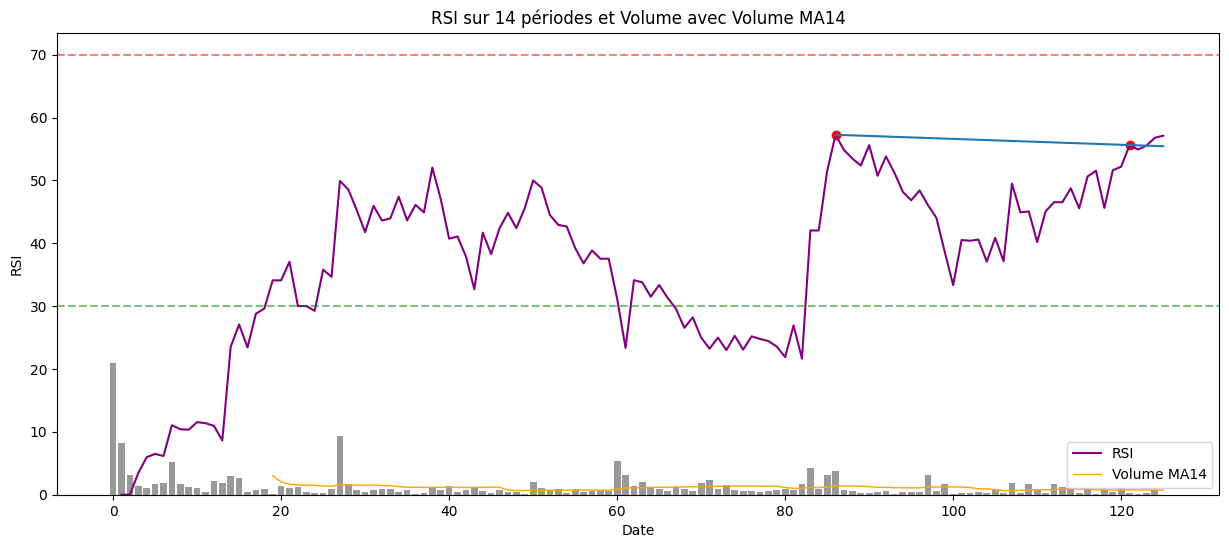

Asset: ALGRO.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALGRO&interval=1W


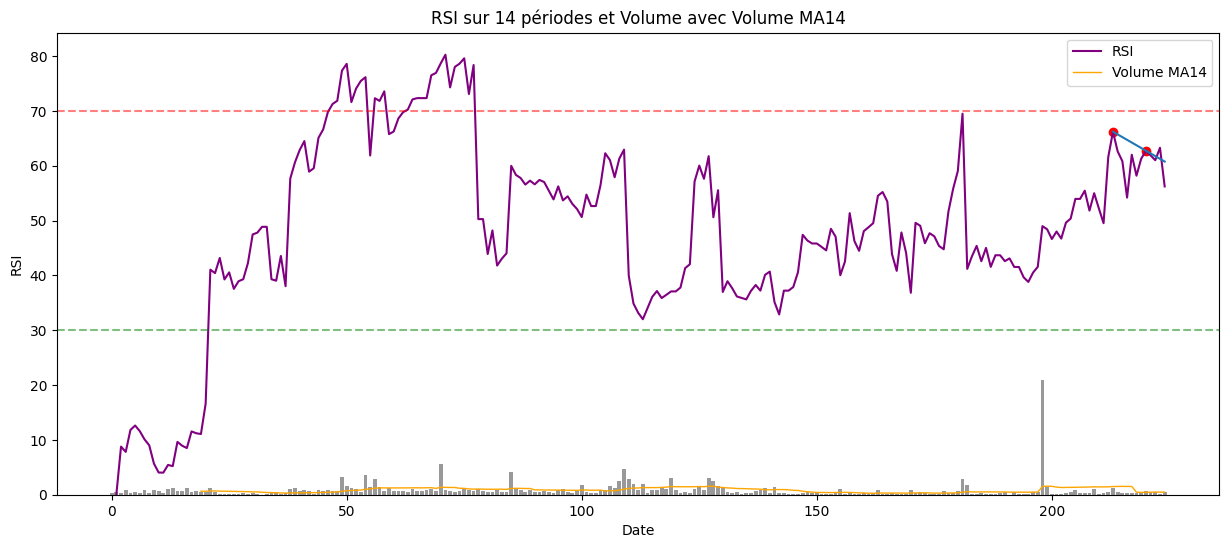

Asset: ALHF.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALHF&interval=1W


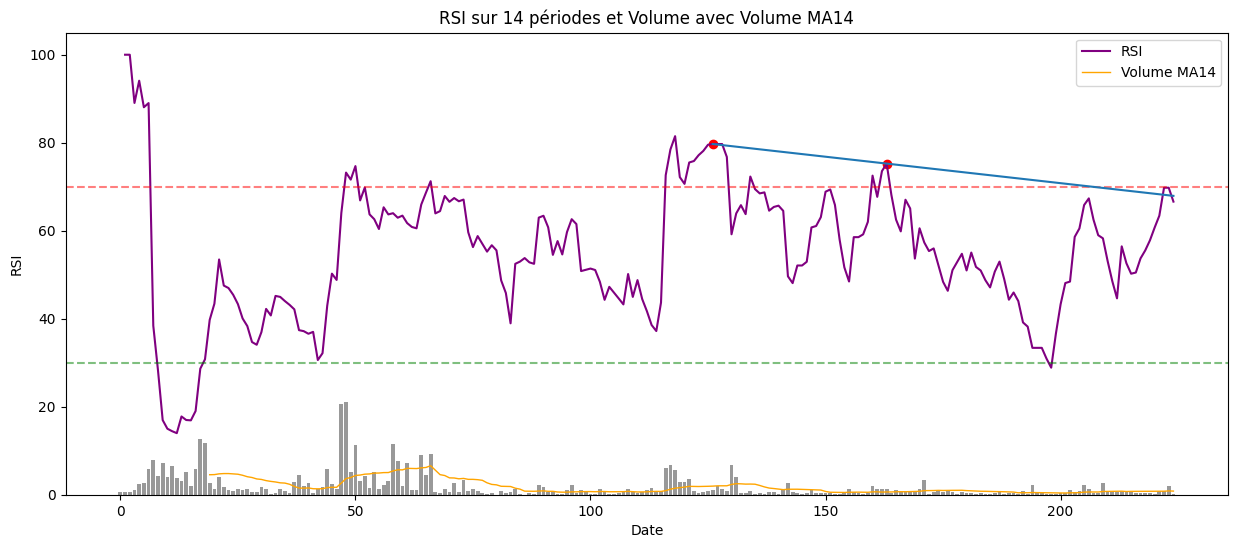

Asset: ALHOP.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALHOP&interval=1W


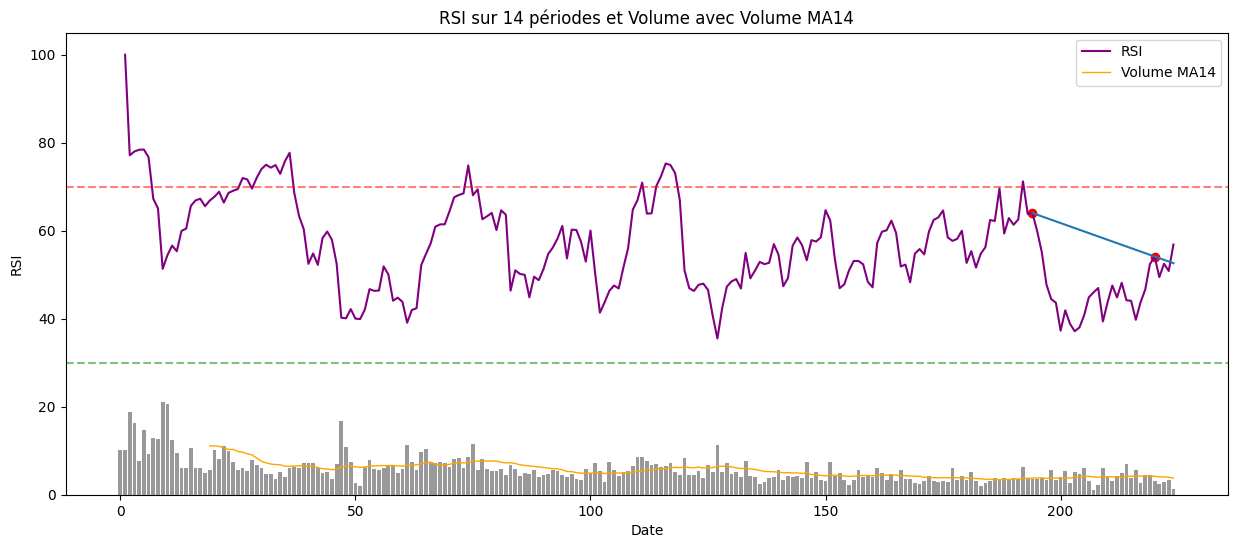

Asset: IPN.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=IPN&interval=1W


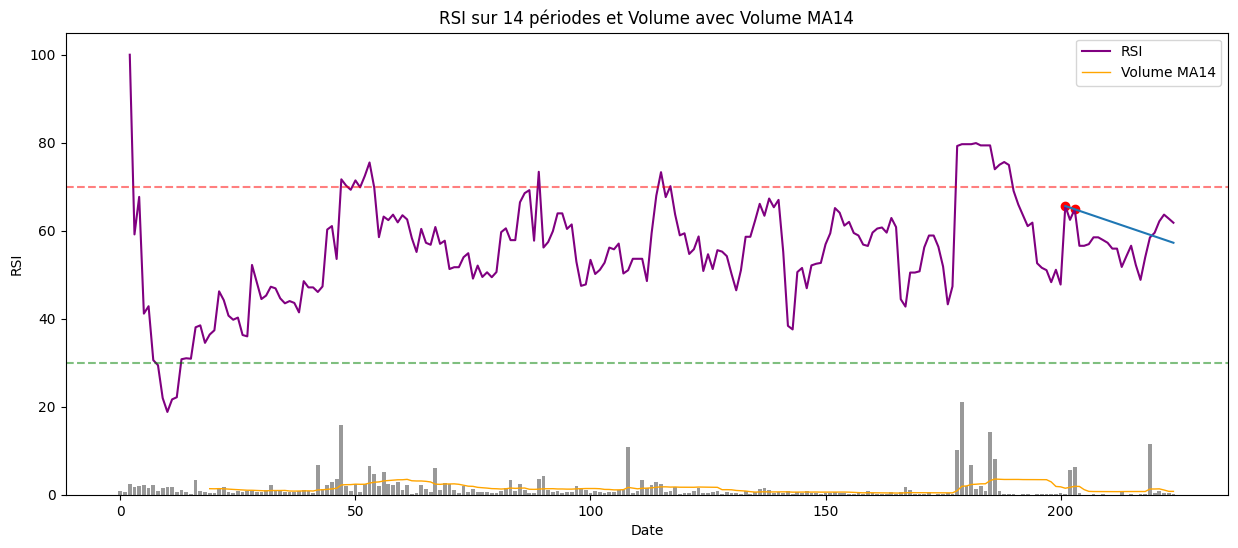

Asset: ALKEY.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALKEY&interval=1W


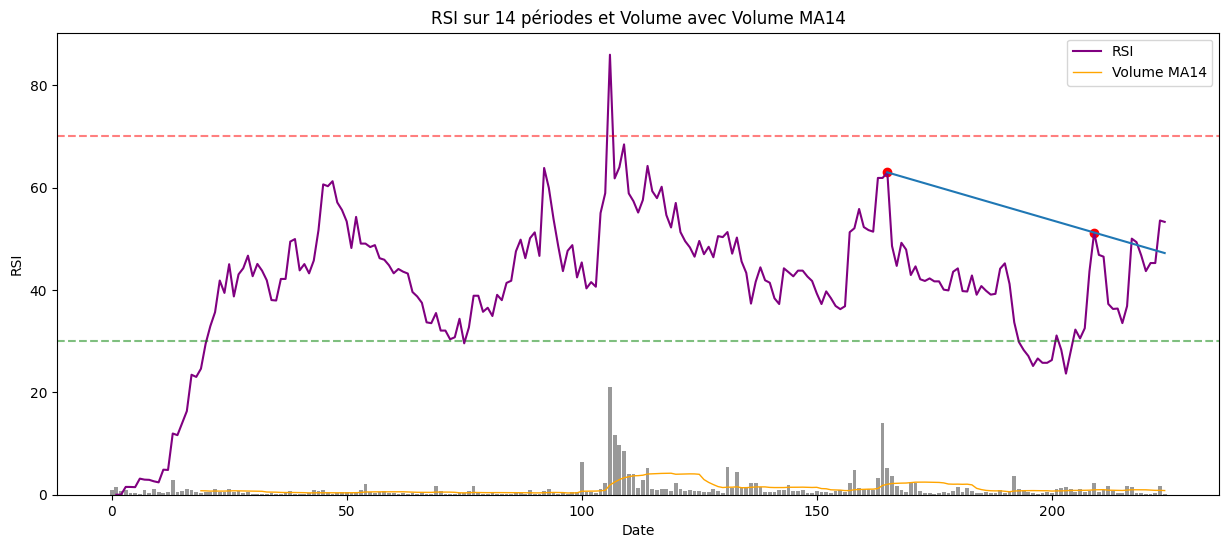

Asset: ALUCI.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALUCI&interval=1W


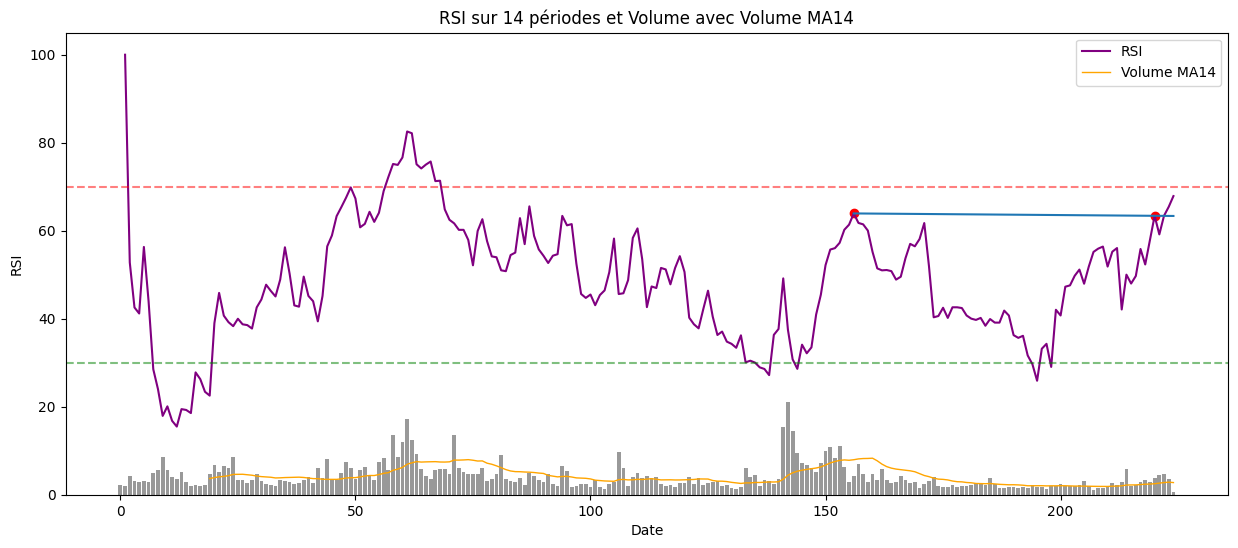

Asset: MMT.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=MMT&interval=1W


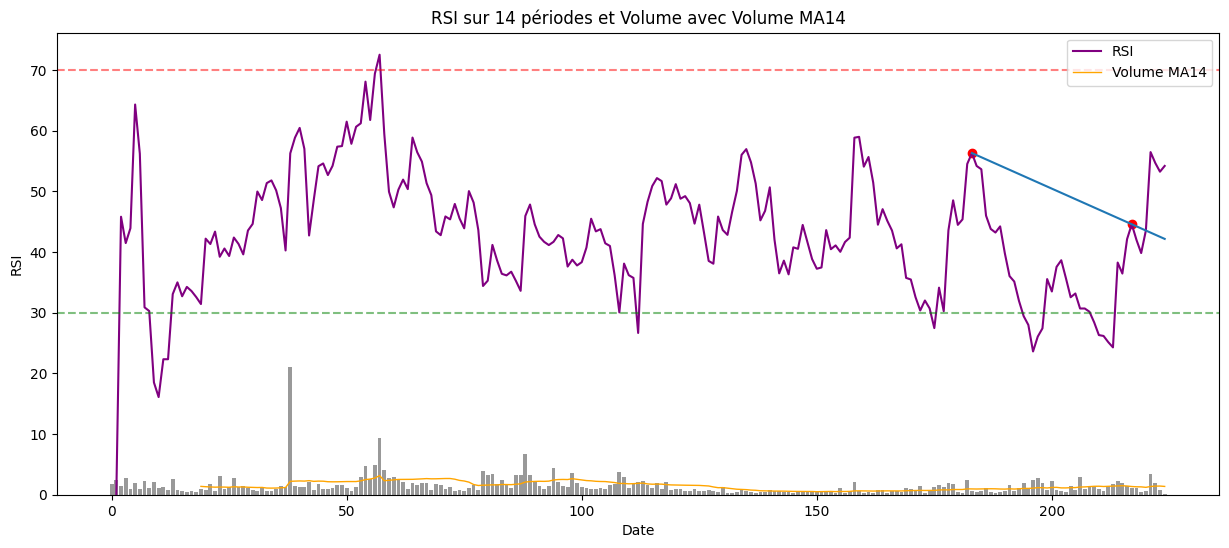

Asset: ALMDG.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALMDG&interval=1W


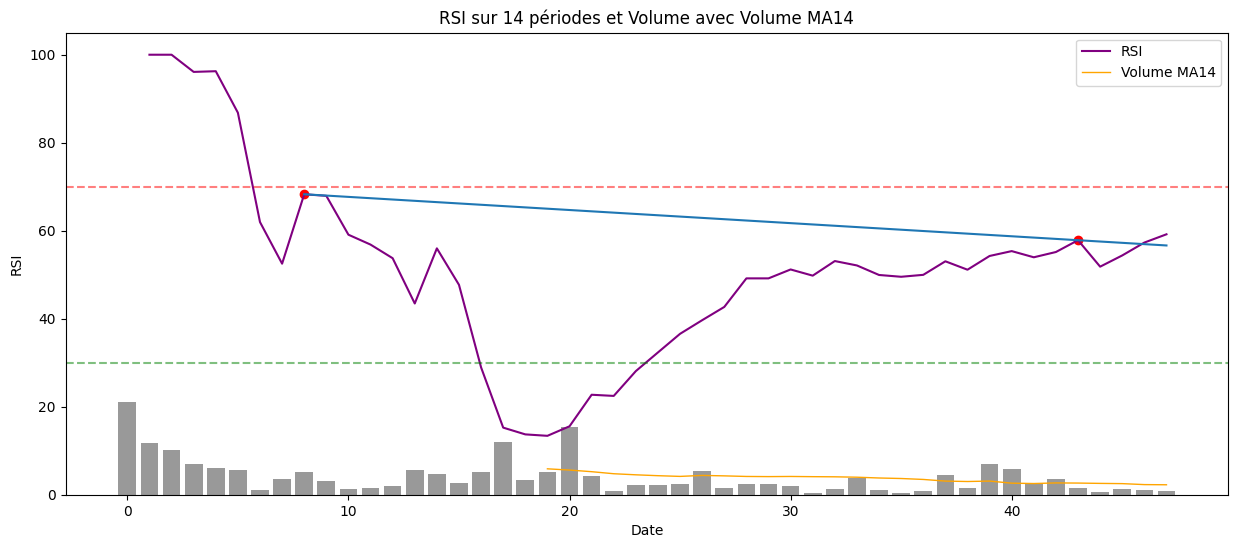

Asset: ALMCE.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ALMCE&interval=1W


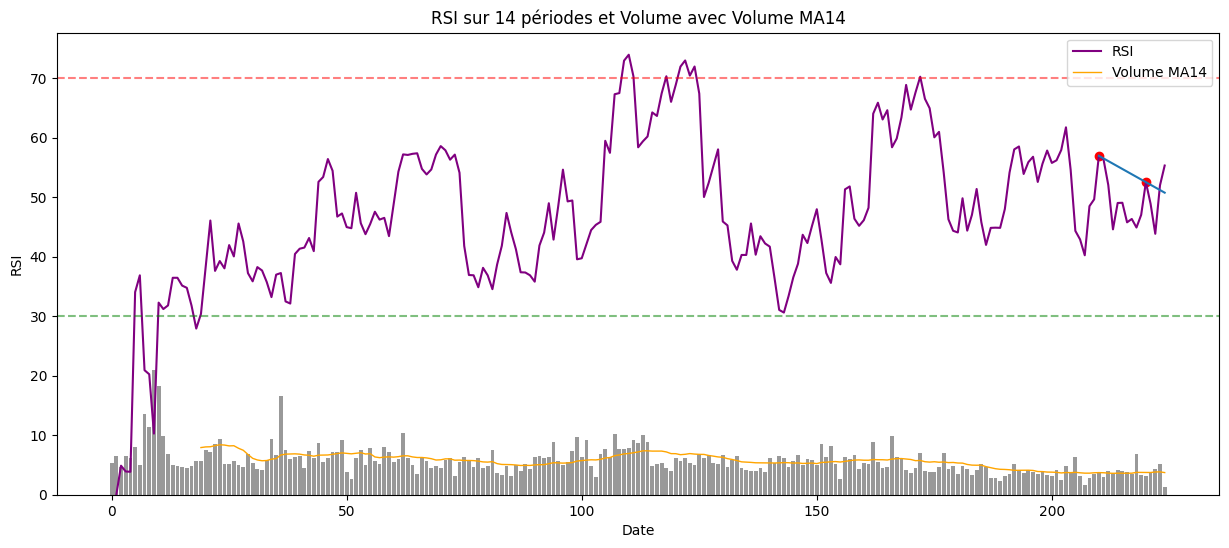

Asset: ORA.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=ORA&interval=1W


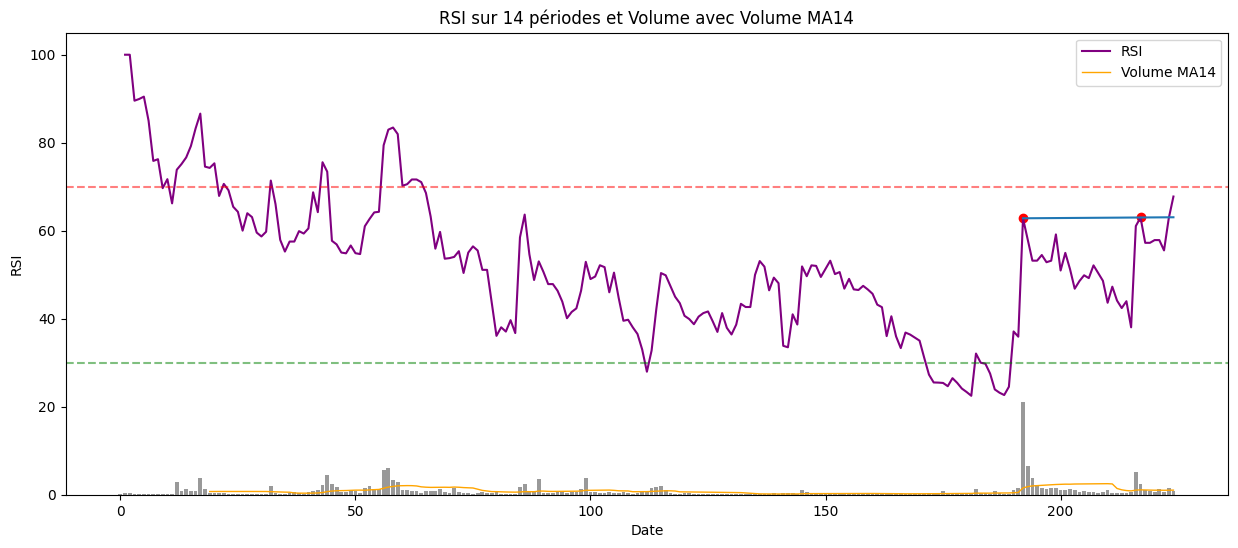

Asset: OSE.PA, Score: 3, URL: https://www.tradingview.com/chart/?symbol=OSE&interval=1W


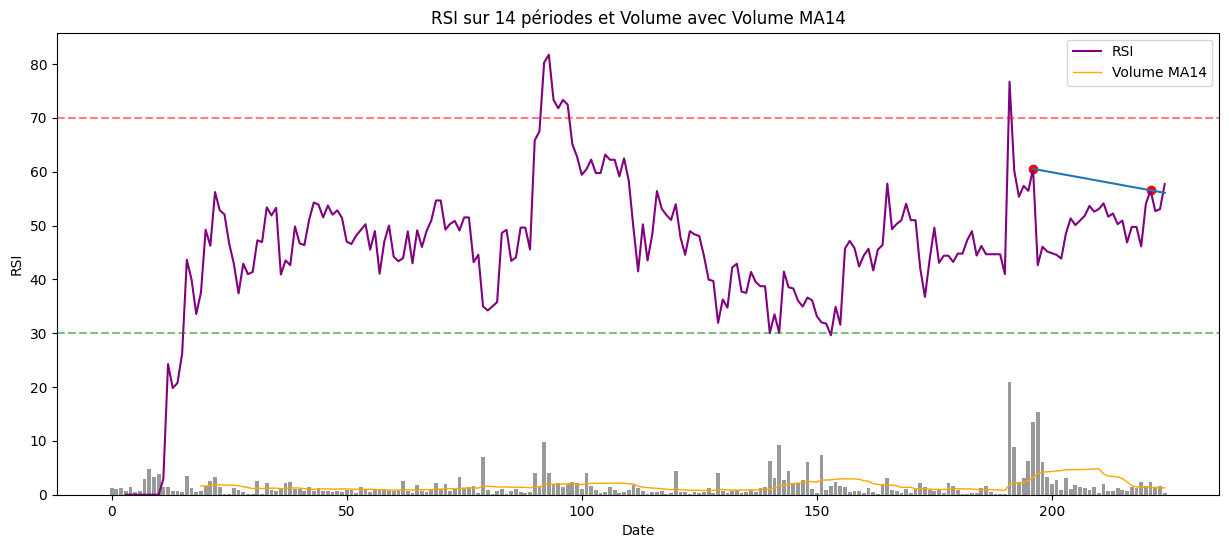

Asset: ACAN.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=ACAN&interval=1W


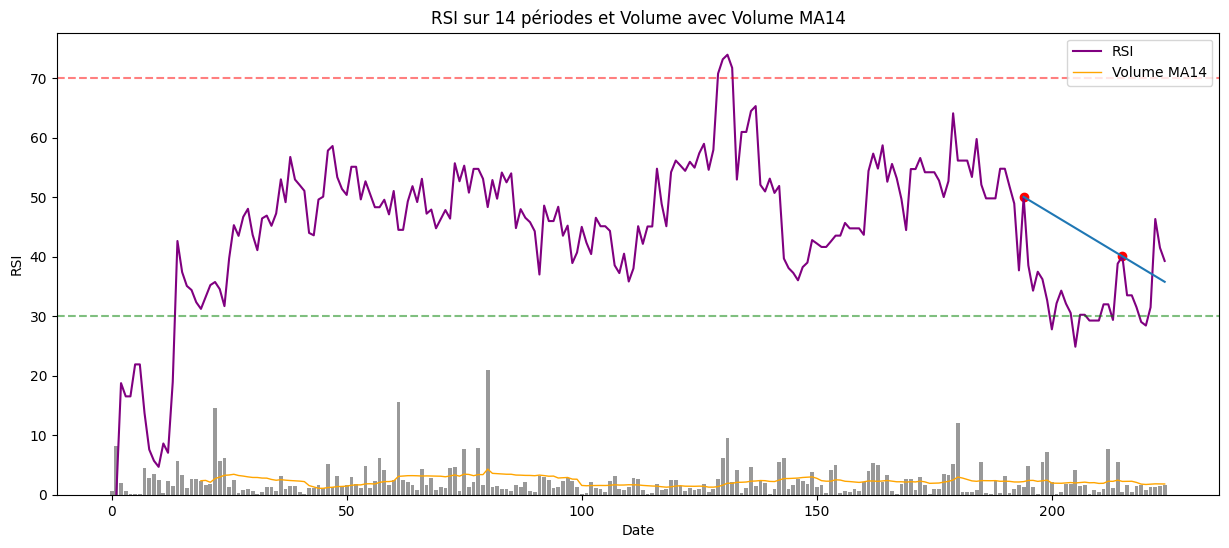

Asset: ALAVI.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=ALAVI&interval=1W


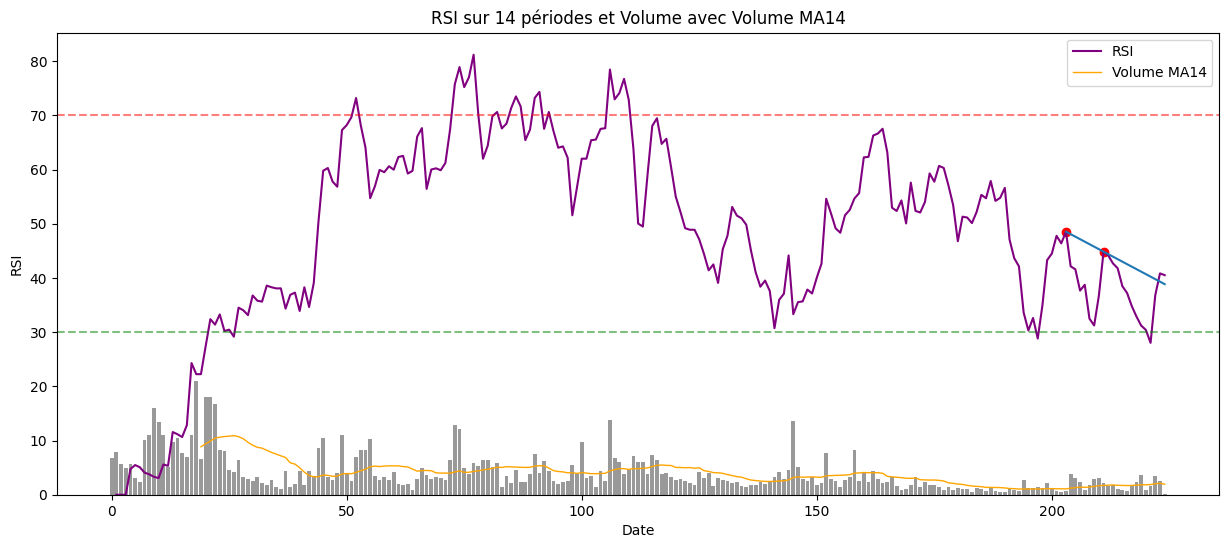

Asset: CATG.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=CATG&interval=1W


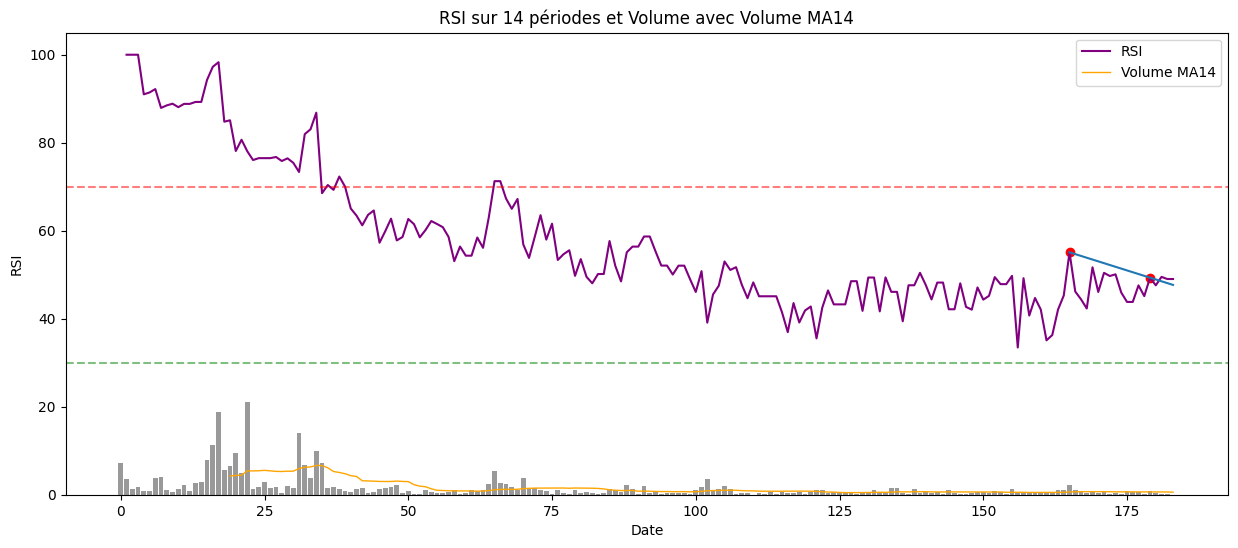

Asset: MLLCB.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=MLLCB&interval=1W


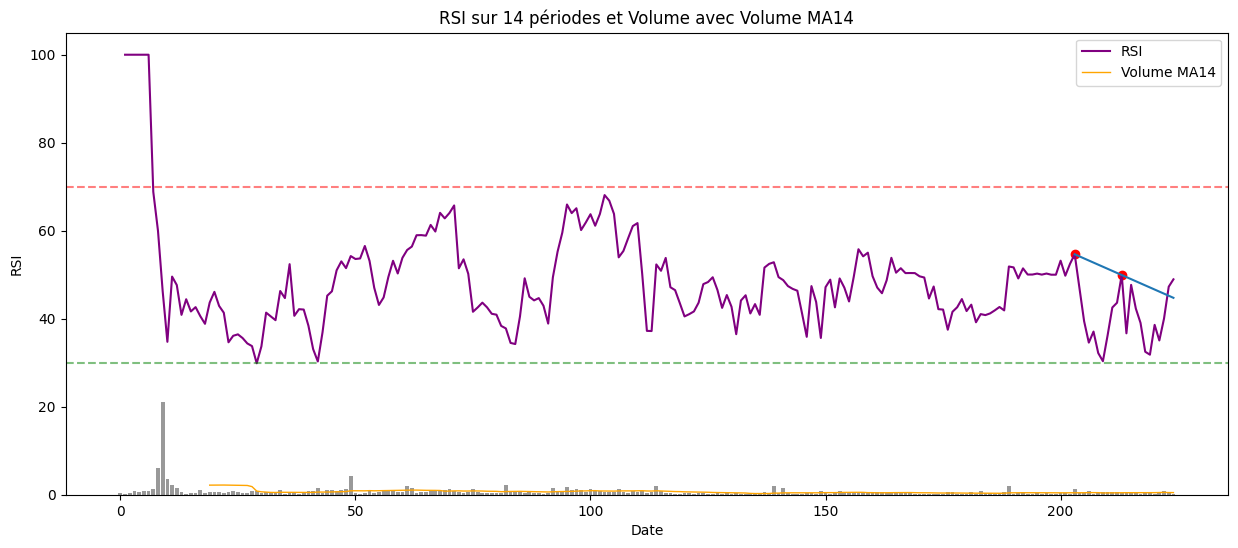

Asset: CAF.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=CAF&interval=1W


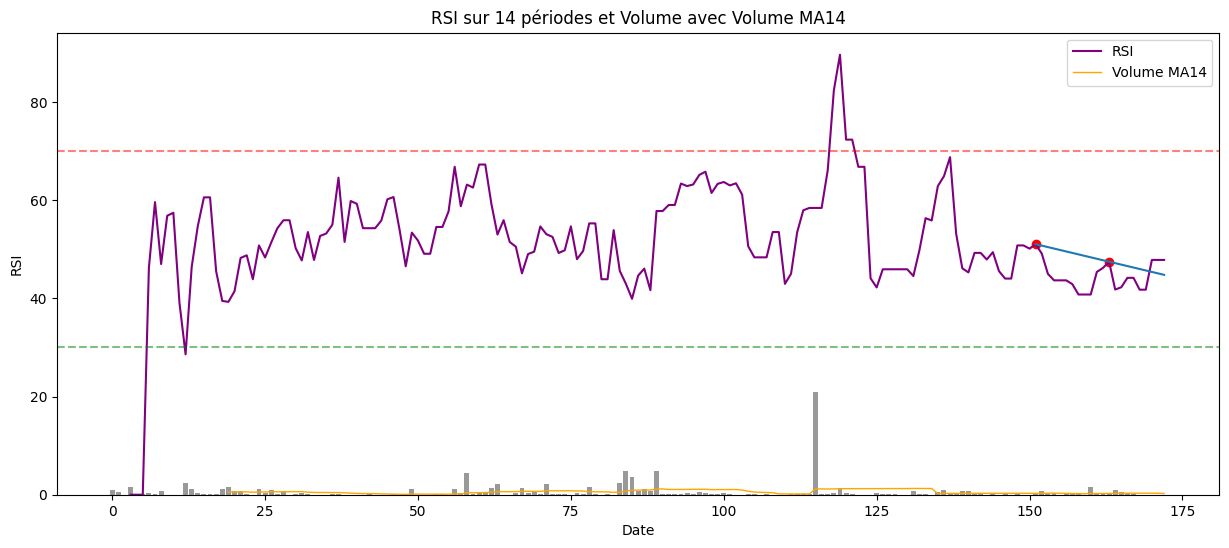

Asset: CROS.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=CROS&interval=1W


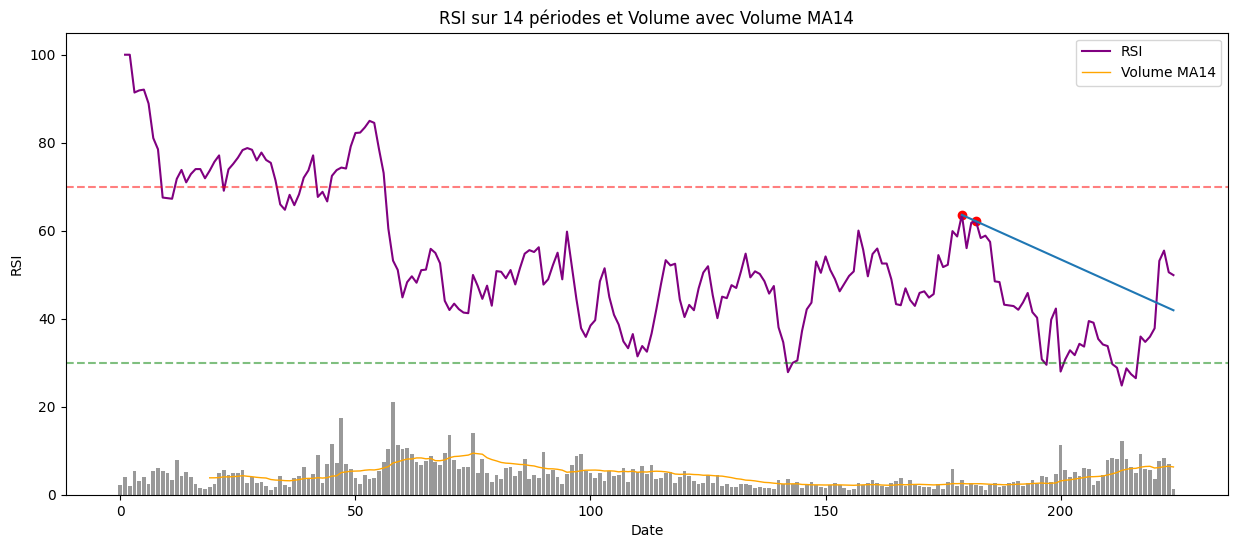

Asset: EQS.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=EQS&interval=1W


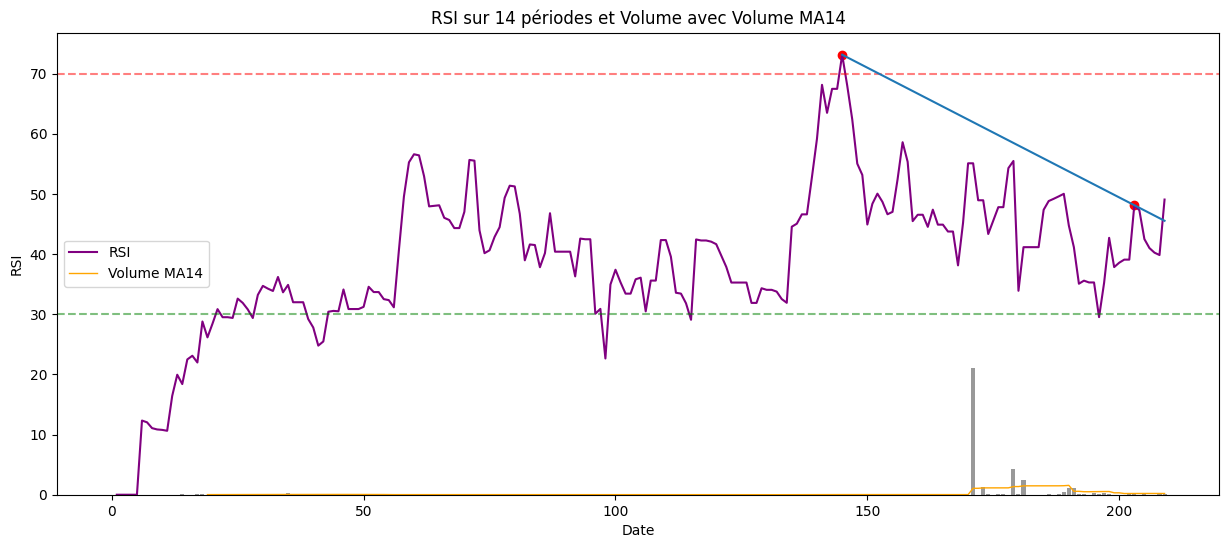

Asset: ALPHI.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=ALPHI&interval=1W


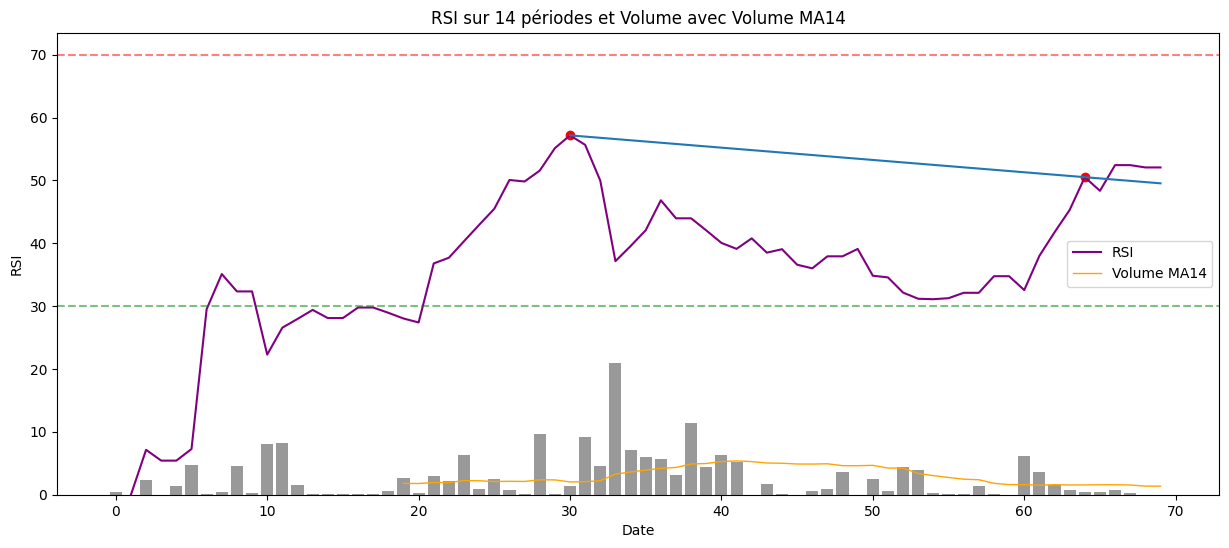

Asset: MLLAB.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=MLLAB&interval=1W


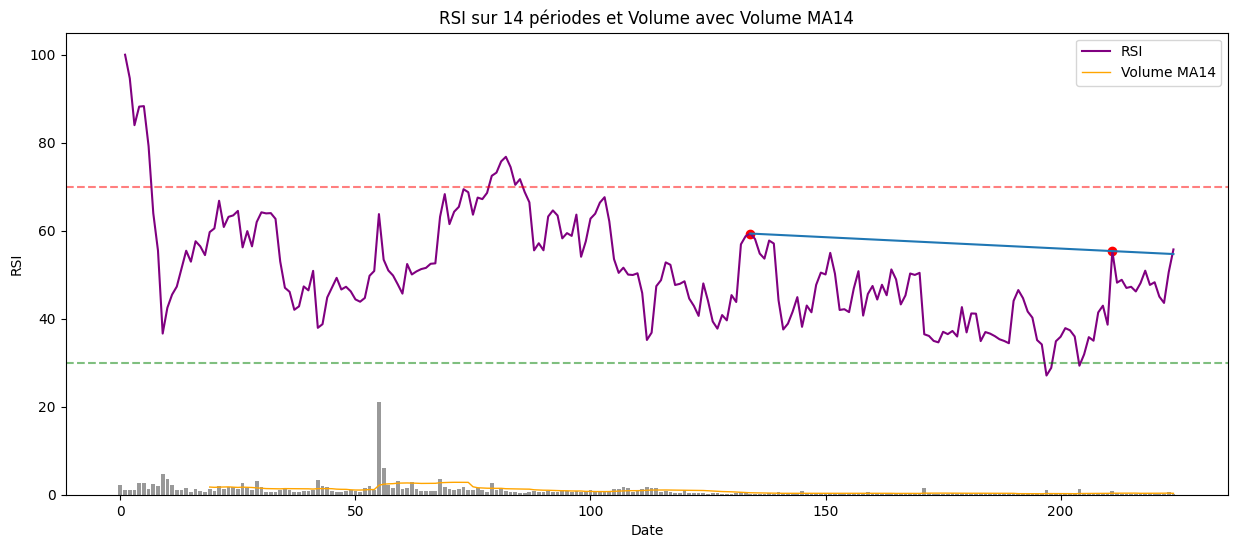

Asset: NOKIA.PA, Score: 2, URL: https://www.tradingview.com/chart/?symbol=NOKIA&interval=1W


In [2]:
from src.mtal import screen_best_stocks

screen_best_stocks(limit=400)